In [ ]:
!pip install pandas numpy scikit-learn tensorflow matplotlib seaborn xgboost statsmodels

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, GRU
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from subprocess import check_output
import seaborn as sns
import math
from keras.layers import TimeDistributed
from keras.constraints import non_neg
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('../content/sample_data/data.csv')
df.head(2)

date  l_ipn  r_asn  f
0  7/1/2006      0    701  1
1  7/1/2006      0    714  1

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df = df.groupby([df['date'].dt.date, 'l_ipn']).sum().reset_index()

df['date'] = pd.to_datetime(df['date'], errors='coerce')

<ipython-input-6-ce03edb69959>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby([df['date'].dt.date, 'l_ipn']).sum().reset_index()


In [ ]:
df['yday'] = df['date'].dt.dayofyear
df['wday'] = df['date'].dt.dayofweek

In [ ]:
max_values = df.groupby('l_ipn')['f'].max().reset_index()

for i in range(10):
    ip_i = df[df['l_ipn'] == i]
    max_i = max_values[max_values['l_ipn'] == i]['f'].values[0]
    print(f"Max value for l_ipn {i}: {max_i}")
    print(ip_i.head(2))
    print("\n")

Max value for l_ipn 0: 7488
         date  l_ipn   r_asn    f  yday  wday
0  2006-07-01      0  436704  106   182     5
10 2006-07-02      0  460025  920   183     6


Max value for l_ipn 1: 10574
         date  l_ipn   r_asn     f  yday  wday
1  2006-07-01      1  182194   640   182     5
11 2006-07-02      1  447528  2661   183     6


Max value for l_ipn 2: 13421
         date  l_ipn   r_asn     f  yday  wday
2  2006-07-01      2  212966  1677   182     5
12 2006-07-02      2   96897  2036   183     6


Max value for l_ipn 3: 350
         date  l_ipn  r_asn   f  yday  wday
3  2006-07-01      3  96376  22   182     5
13 2006-07-02      3  69276  30   183     6


Max value for l_ipn 4: 785297
         date  l_ipn   r_asn    f  yday  wday
4  2006-07-01      4  120507  184   182     5
14 2006-07-02      4  132407  941   183     6


Max value for l_ipn 5: 862
         date  l_ipn   r_asn   f  yday  wday
5  2006-07-01      5  125647  44   182     5
15 2006-07-02      5  141354  60   183  

In [ ]:
ip0 = df[df['l_ipn'] == 0]

count, division = np.histogram(ip0['f'], bins=10)

print(division)

[  68.  810. 1552. 2294. 3036. 3778. 4520. 5262. 6004. 6746. 7488.]


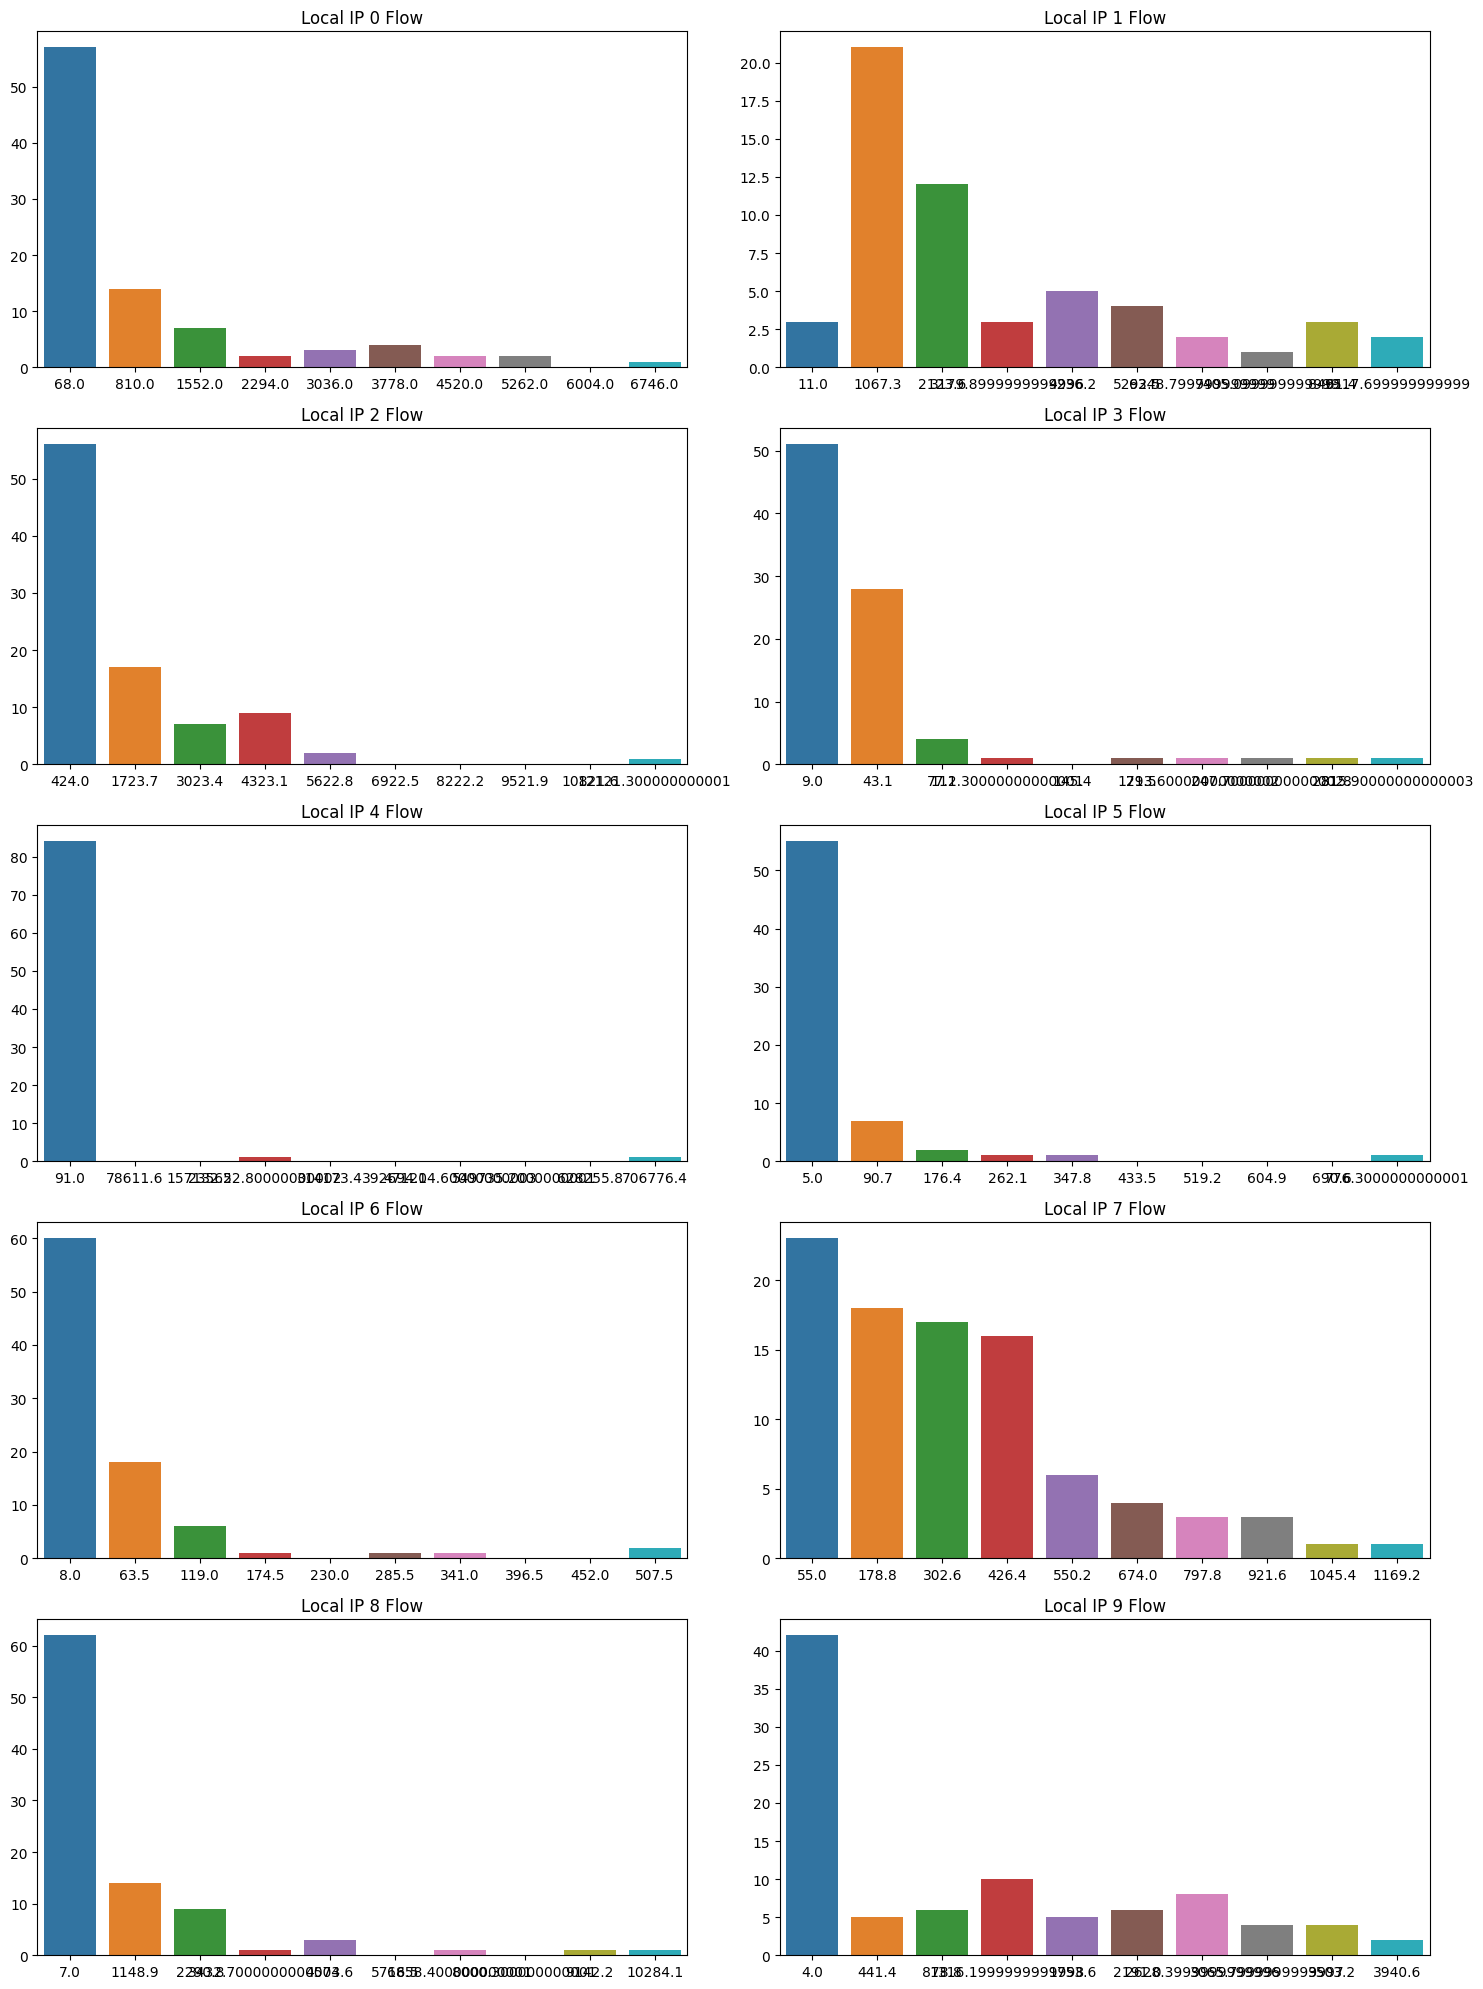

In [ ]:
fig, axarray = plt.subplots(5, 2, figsize=(15, 20))

for i in range(10):
    ip_i = df[df['l_ipn'] == i]
    count, division = np.histogram(ip_i['f'], bins=10)

    row = i // 2
    col = i % 2

    sns.barplot(x=division[0:len(division)-1], y=count, ax=axarray[row, col])
    axarray[row, col].set_title(f"Local IP {i} Flow")

plt.tight_layout()
plt.show()

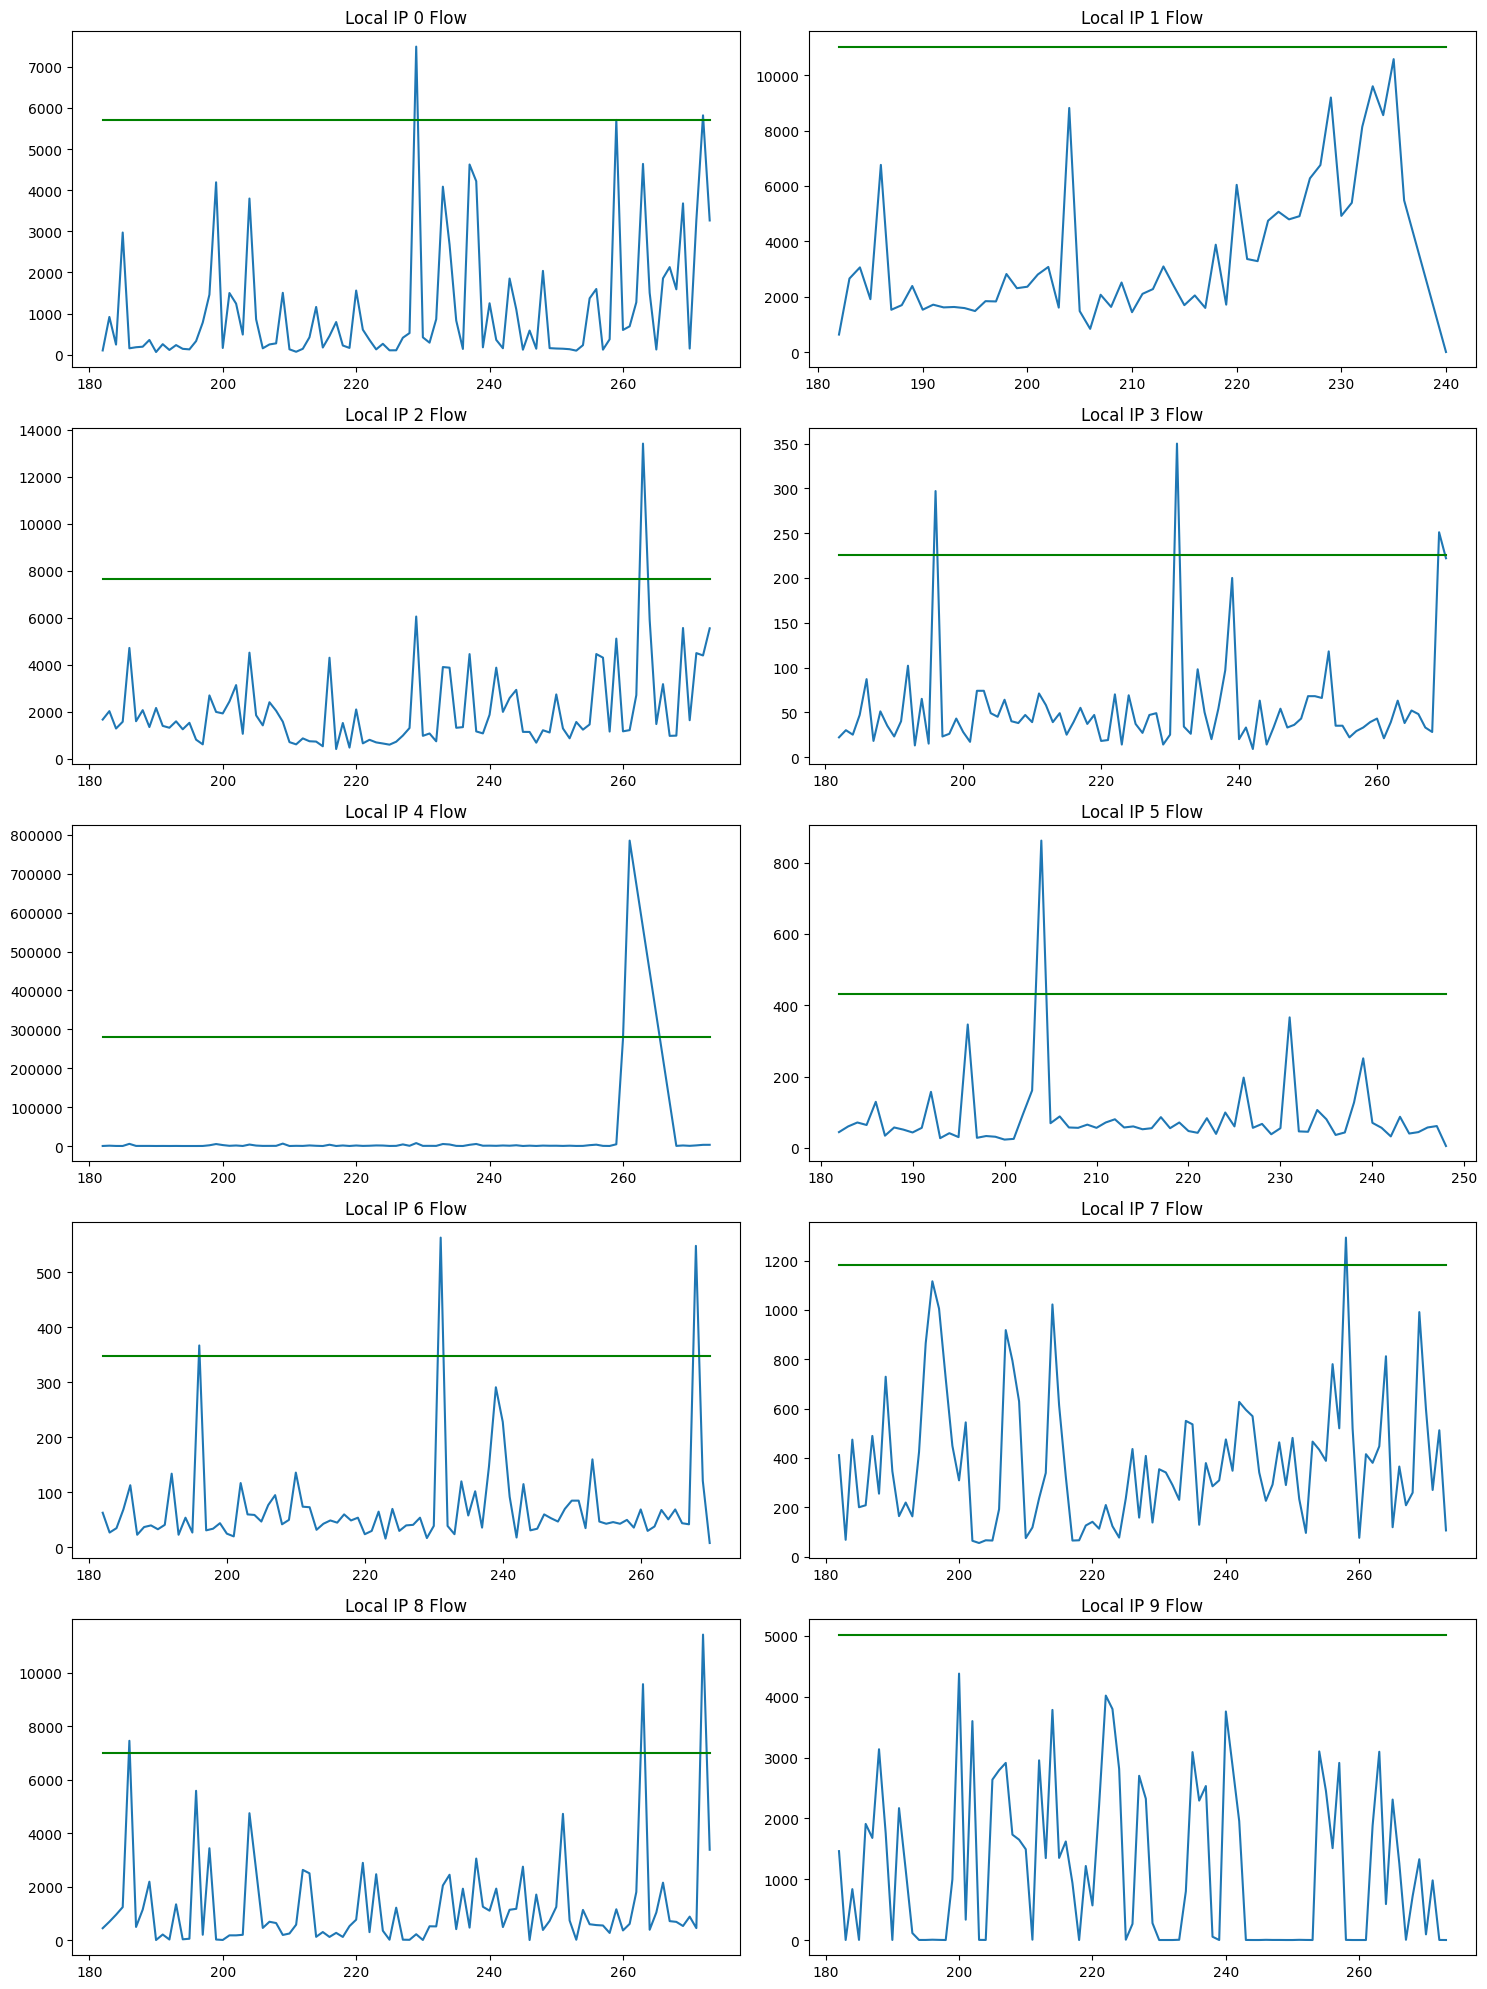

In [ ]:
fig, axarray = plt.subplots(5, 2, figsize=(15, 20))

for i in range(10):
    ip_i = df[df['l_ipn'] == i]

    row = i // 2
    col = i % 2

    axarray[row, col].plot(ip_i['yday'], ip_i['f'])
    axarray[row, col].plot(ip_i['yday'], [ip_i['f'].mean() + 3 * ip_i['f'].std(ddof=0)] * len(ip_i['yday']), color='g')

    axarray[row, col].set_title(f"Local IP {i} Flow")

plt.tight_layout()
plt.show()


In [ ]:
ip0 = df[df['l_ipn'] == 0]
max0 = np.max(ip0['f'])

ip1 = df[df['l_ipn'] == 1].iloc[:-5]
max1 = np.max(ip1['f'])

ip2 = df[df['l_ipn'] == 2]
max2 = np.max(ip2['f'])

ip3 = df[df['l_ipn'] == 3]
max3 = np.max(ip3['f'])

ip4 = df[df['l_ipn'] == 4].iloc[:-7]
max4 = np.max(ip4['f'])

ip5 = df[df['l_ipn'] == 5]
max5 = np.max(ip5['f'])

ip6 = df[df['l_ipn'] == 6]
max6 = np.max(ip6['f'])

ip7 = df[df['l_ipn'] == 7]
max7 = np.max(ip7['f'])

ip8 = df[df['l_ipn'] == 8]
max8 = np.max(ip8['f'])

ip9 = df[df['l_ipn'] == 9]
max9 = np.max(ip9['f'])

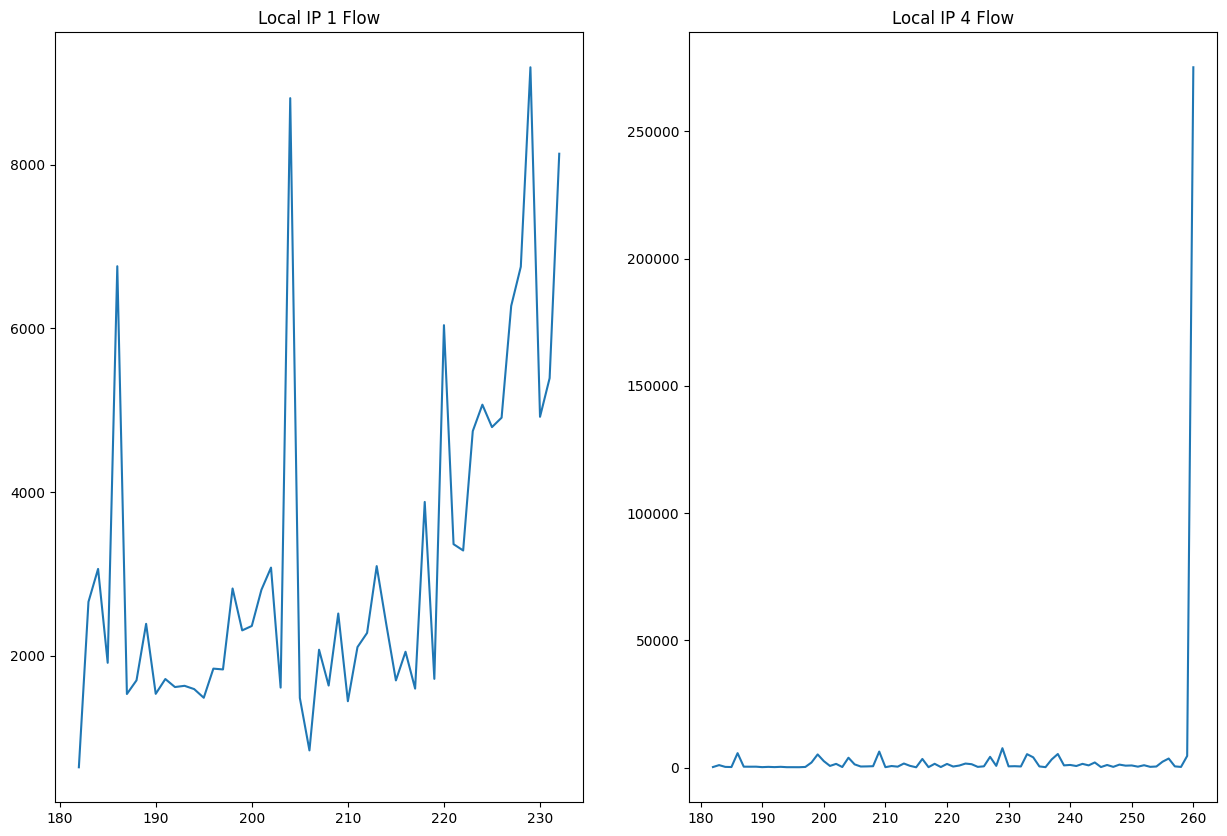

In [ ]:
fig, axarray = plt.subplots(1, 2, figsize=(15, 10))

axarray[0].plot(ip1['yday'], ip1['f'])
axarray[0].set_title("Local IP 1 Flow")

axarray[1].plot(ip4['yday'], ip4['f'])
axarray[1].set_title("Local IP 4 Flow")

plt.show()

<ipython-input-14-935f079cfa1c>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(x=ip_i.groupby('wday', as_index=False).sum()['wday'],
<ipython-input-14-935f079cfa1c>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  y=ip_i.groupby('wday', as_index=False).sum()['f'].values,
<ipython-input-14-935f079cfa1c>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(x=ip_i.groupby('wday', as_index=False).sum()

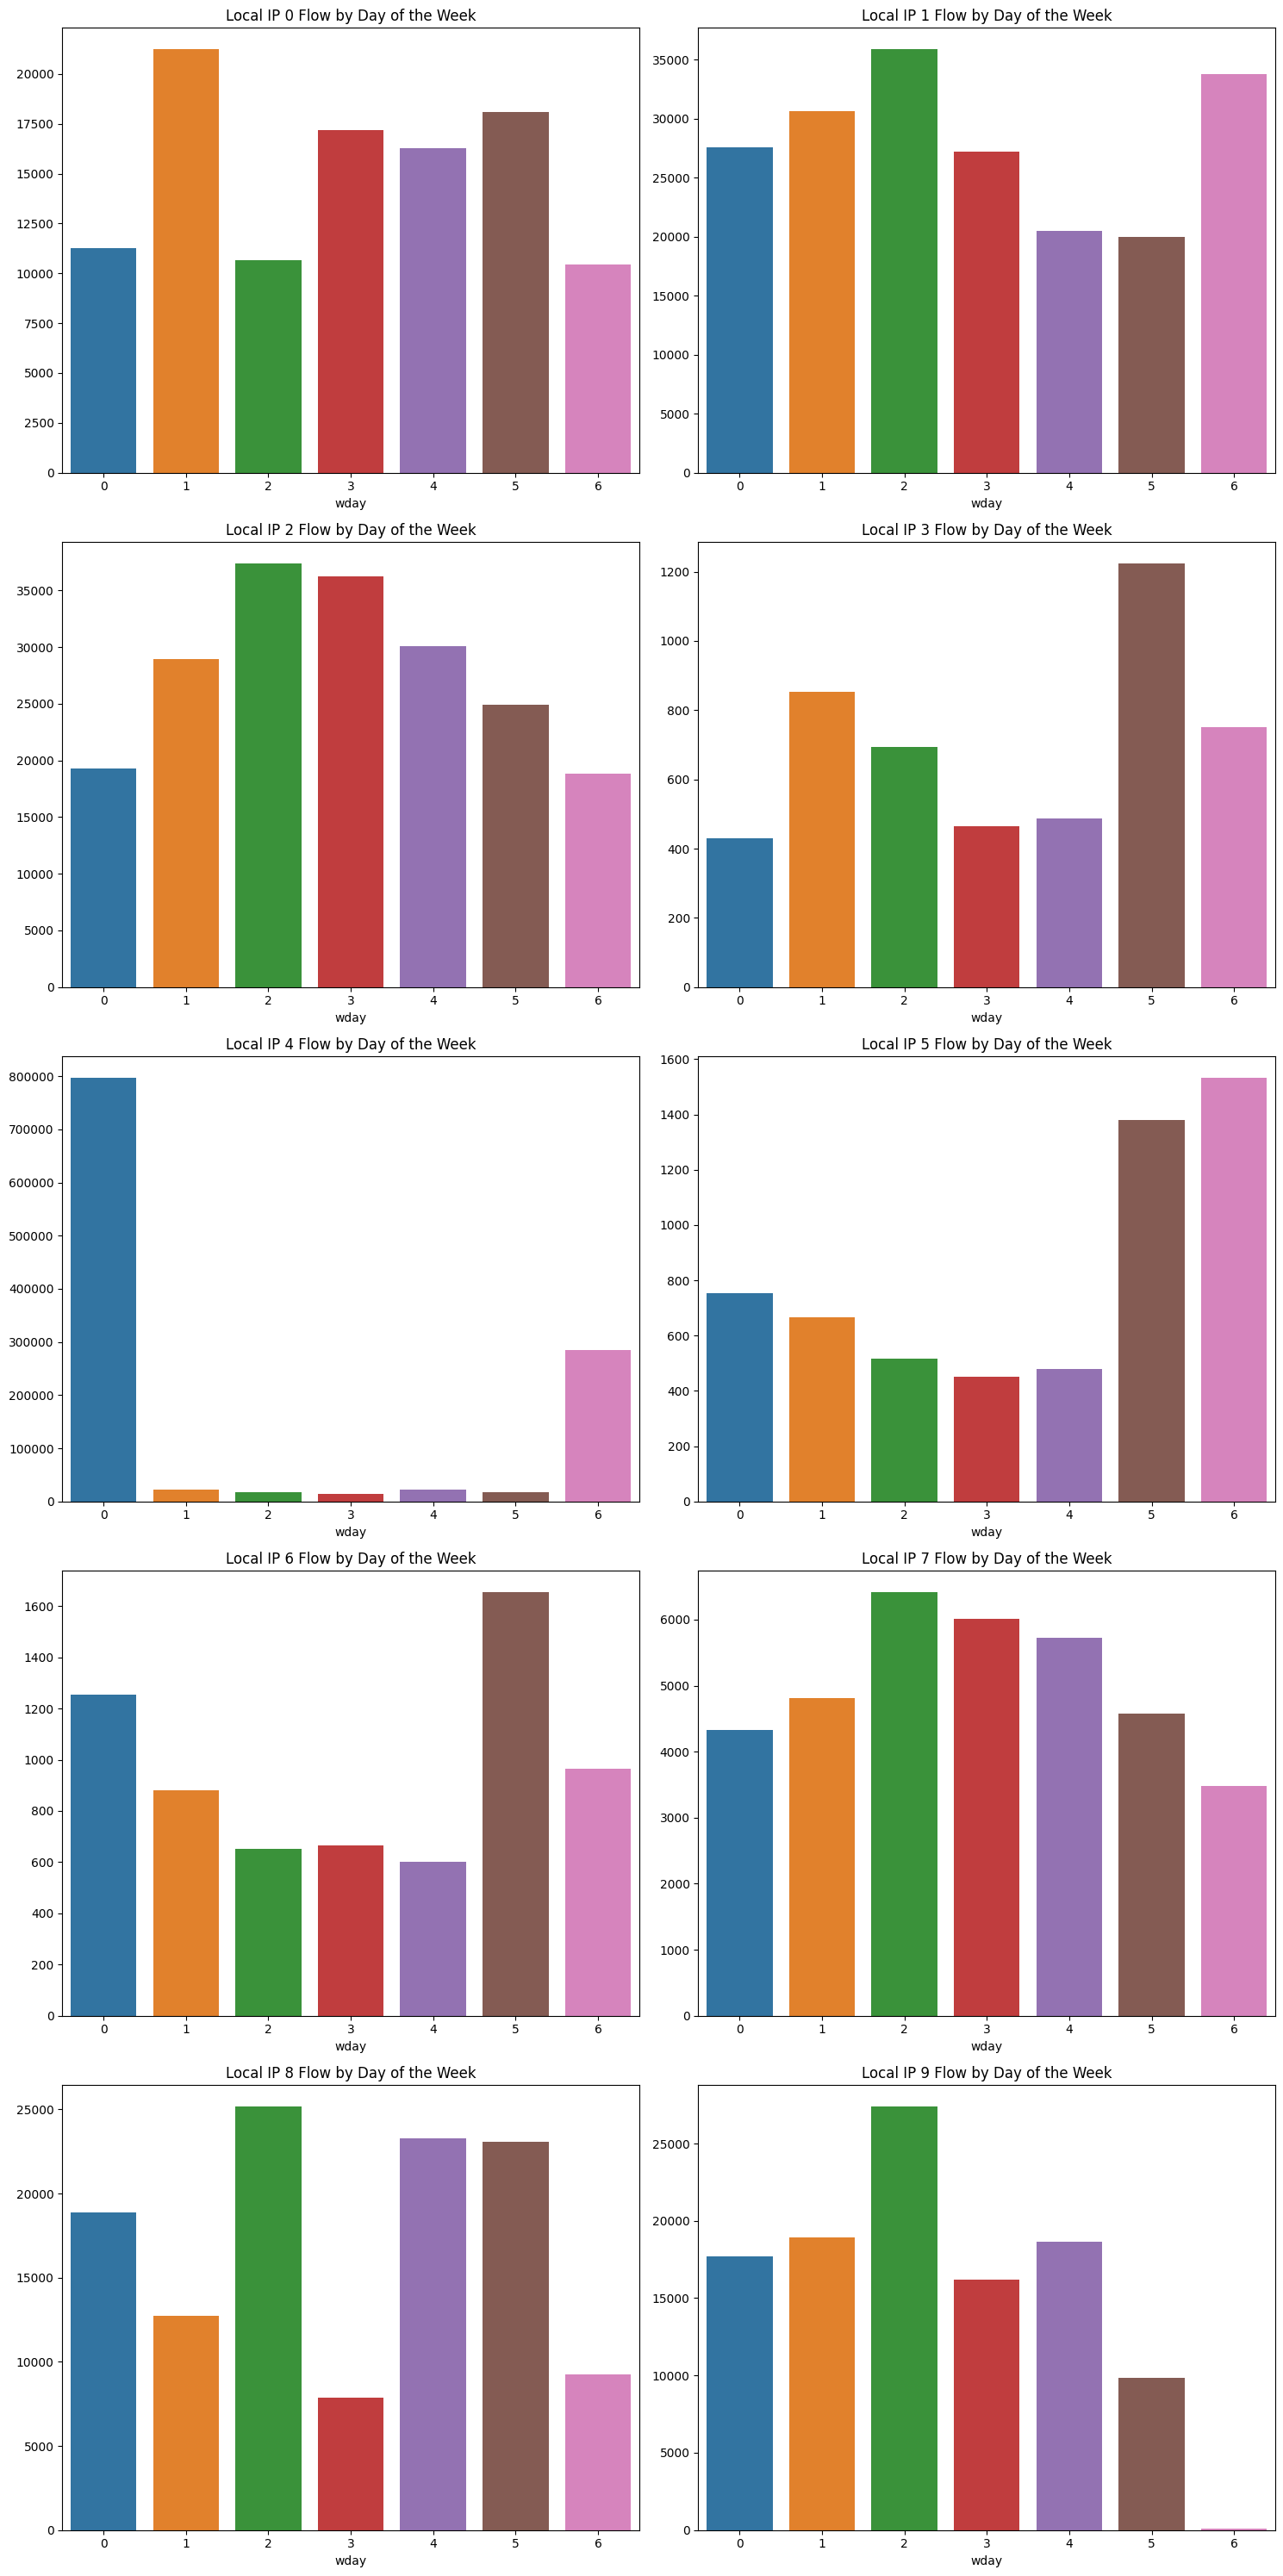

In [ ]:
fig, axarray = plt.subplots(5, 2, figsize=(15, 30))

for i in range(10):
    ip_i = df[df['l_ipn'] == i]

    row = i // 2
    col = i % 2

    sns.barplot(x=ip_i.groupby('wday', as_index=False).sum()['wday'],
                y=ip_i.groupby('wday', as_index=False).sum()['f'].values,
                ax=axarray[row, col])

    axarray[row, col].set_title(f"Local IP {i} Flow by Day of the Week")

plt.tight_layout()
plt.show()

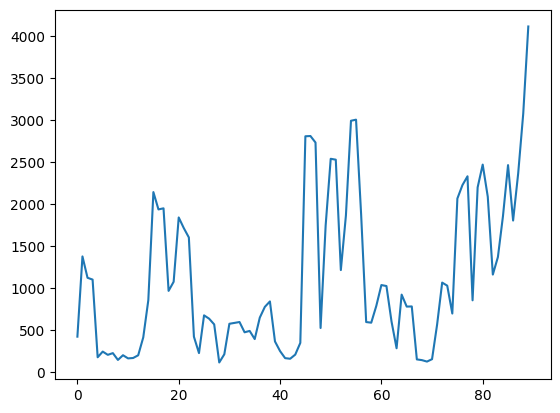

In [ ]:
rolling_mean = np.convolve(ip0['f'], np.ones(3)/3, mode='valid')

plt.plot(range(len(rolling_mean)), rolling_mean)
plt.show()

In [ ]:
ip_list = [ip0, ip1, ip2, ip3, ip4, ip5, ip6, ip7, ip8, ip9]

max_values = [max0, max1, max2, max3, max4, max5, max6, max7, max8, max9]

for i in range(10):
    fv = ip_list[i]['f'] / max_values[i]
    ip_list[i].loc[:, 'f'] = fv.values.reshape(-1, 1)


<ipython-input-16-57329f21eac9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ip_list[i].loc[:, 'f'] = fv.values.reshape(-1, 1)


In [ ]:
def create_dataset(dataset, target_column='f', look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)].values
        dataX.append(a)
        dataY.append(dataset[target_column].iloc[i + look_back])
    return np.array(dataX), np.array(dataY)


In [ ]:
look_back = 14

def train_custom_model(dataset, feature_column='f', look_back=14, units_gru1=64, units_gru2=32, epochs=100, batch_size=16):
    dataset[feature_column] = dataset[feature_column].astype('float32')

    train_data = dataset.head(look_back * 5).copy()
    train_X, train_Y = create_dataset(train_data, target_column=feature_column, look_back=look_back)
    train_X = np.reshape(train_X, (train_X.shape[0], look_back, train_X.shape[2]))

    model = Sequential()
    model.add(GRU(units_gru1, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
    model.add(GRU(units_gru2))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='sgd')
    model.fit(train_X, train_Y, epochs=epochs, batch_size=batch_size, verbose=0)

    return model

In [ ]:
def predict_flow(model, data, look_back):
    y_pred = [0] * look_back

    for k in range(len(data) - look_back):
        pattern = data[k:k + look_back].values
        x = np.reshape(pattern, (1, len(pattern), 2))
        y_pred.append(model.predict(x)[0][0])

    return y_pred


In [ ]:
m0 = train_custom_model(ip0[['f','wday']].copy())
m1 = train_custom_model(ip1[['f','wday']].copy())
m2 = train_custom_model(ip2[['f','wday']].copy())
m3 = train_custom_model(ip3[['f','wday']].copy())
m4 = train_custom_model(ip4[['f','wday']].copy())
m5 = train_custom_model(ip5[['f','wday']].copy())
m6 = train_custom_model(ip6[['f','wday']].copy())
m7 = train_custom_model(ip7[['f','wday']].copy())
m8 = train_custom_model(ip8[['f','wday']].copy())
m9 = train_custom_model(ip9[['f','wday']].copy())


In [ ]:
for i, (model, ip_data, max_val) in enumerate(zip([m0, m1, m2, m3, m4, m5, m6, m7, m8, m9],
                                                  [ip0, ip1, ip2, ip3, ip4, ip5, ip6, ip7, ip8, ip9],
                                                  [max0, max1, max2, max3, max4, max5, max6, max7, max8, max9])):
    predicted_flow = np.multiply(predict_flow(model, ip_data[['f', 'wday']].copy(), look_back), max_val)
    actual_flow = np.multiply(ip_data['f'], max_val)

    globals()['ip{}f'.format(i)] = actual_flow
    globals()['ypred{}'.format(i)] = predicted_flow

    mse = mean_squared_error(actual_flow, predicted_flow)
    mae = mean_absolute_error(actual_flow, predicted_flow)
    r2 = r2_score(actual_flow, predicted_flow)

    print(f"Metrics for Local IP {i}:")
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"R-squared: {r2}")
    print("\n")

1/1 [==============================] - 0s 33ms/step
Metrics for Local IP 0:
MSE: 2259372.1884487895
MAE: 1032.7263122434201
R-squared: 0.022642140721449544


1/1 [==============================] - 0s 25ms/step
Metrics for Local IP 1:
MSE: 5353150.064597142
MAE: 1726.9797866566507
R-squared: -0.24967020001627271


1/1 [==============================] - 0s 22ms/step
Metrics for Local IP 2:
MSE: 4014522.0377243143
MAE: 1339.9890265040424
R-squared: -0.17851550478415068


1/1 [==============================] - 0s 30ms/step
Metrics for Local IP 3:
MSE: 3522.2210878883066
MAE: 32.6628841330831
R-squared: -0.09591451015197006


1/1 [==============================] - 0s 39ms/step
Metrics for Local IP 4:
MSE: 939960426.5675799
MAE: 5200.2672865818
R-squared: -0.00023366550107661865


1/1 [==============================] - 0s 29ms/step
Metrics for Local IP 5:
MSE: 13182.0022686296
MAE: 58.095955036246956
R-squared: -0.0016683102801868799


1/1 [==============================] - 0s 39ms/step
Metr

1/1 [==============================] - 0s 34ms/step


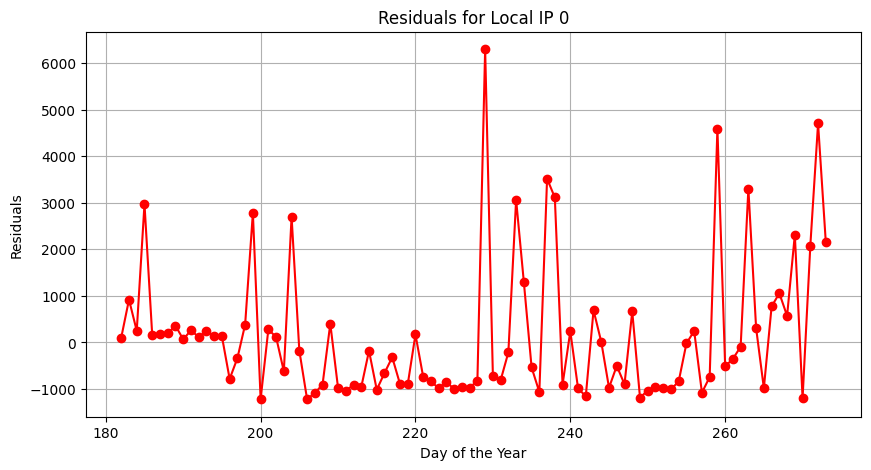

1/1 [==============================] - 0s 22ms/step


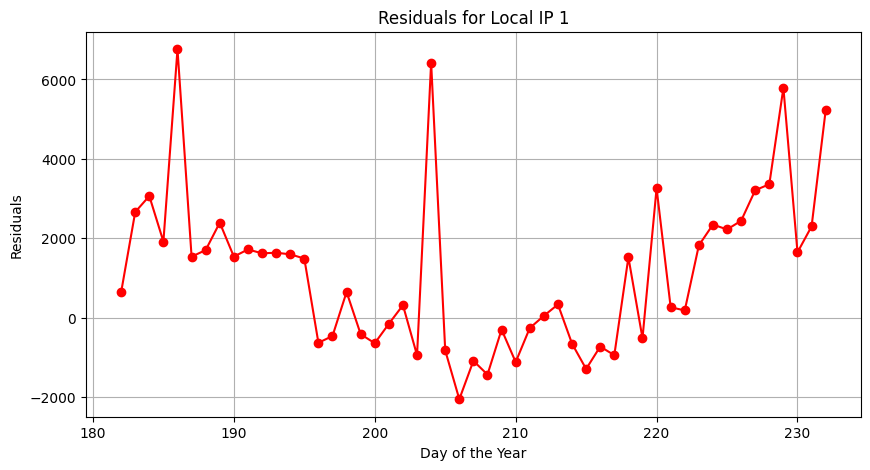

1/1 [==============================] - 0s 22ms/step


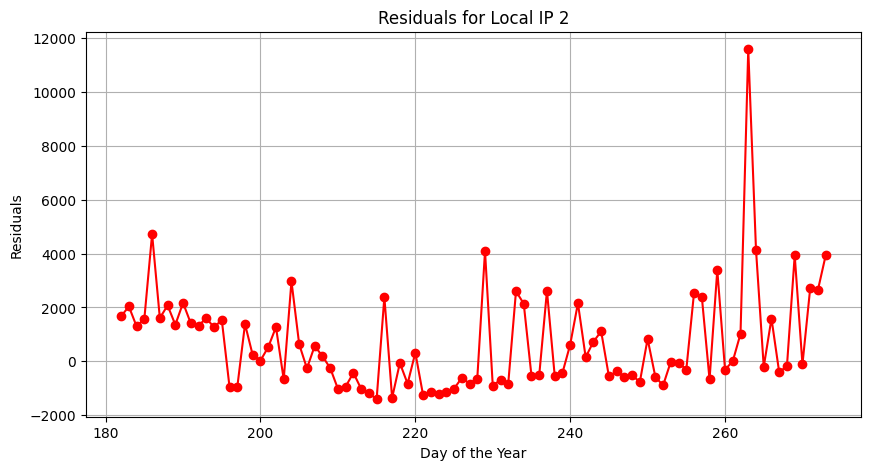

1/1 [==============================] - 0s 22ms/step


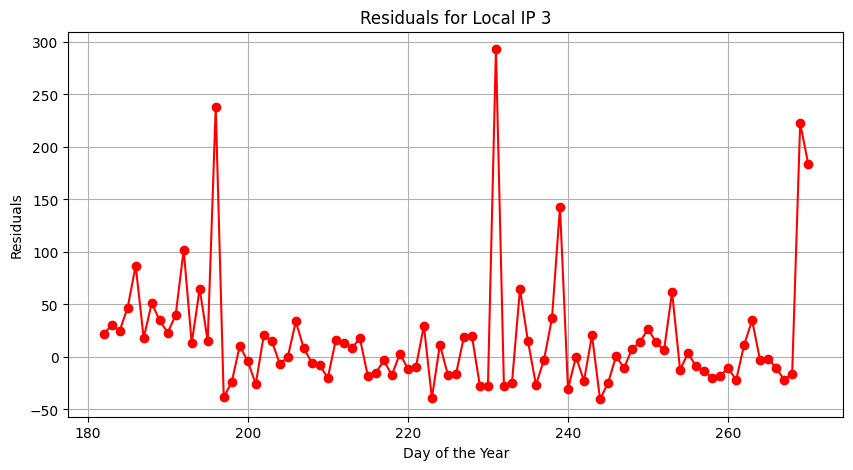

1/1 [==============================] - 0s 23ms/step


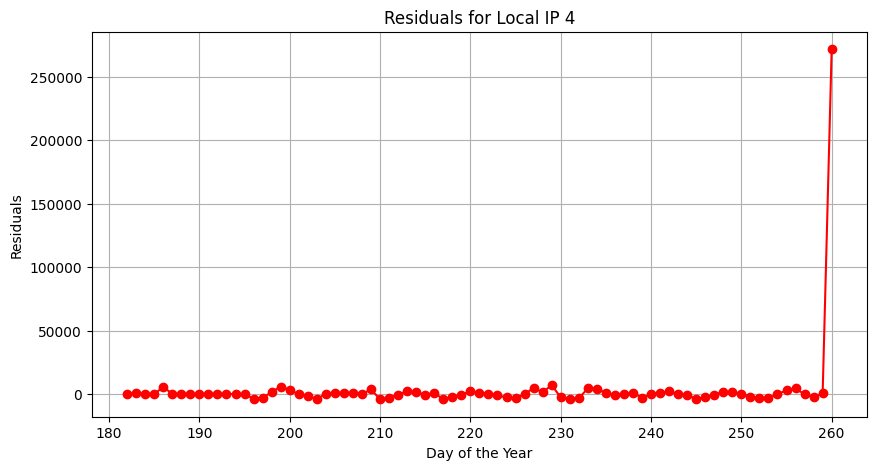

1/1 [==============================] - 0s 23ms/step


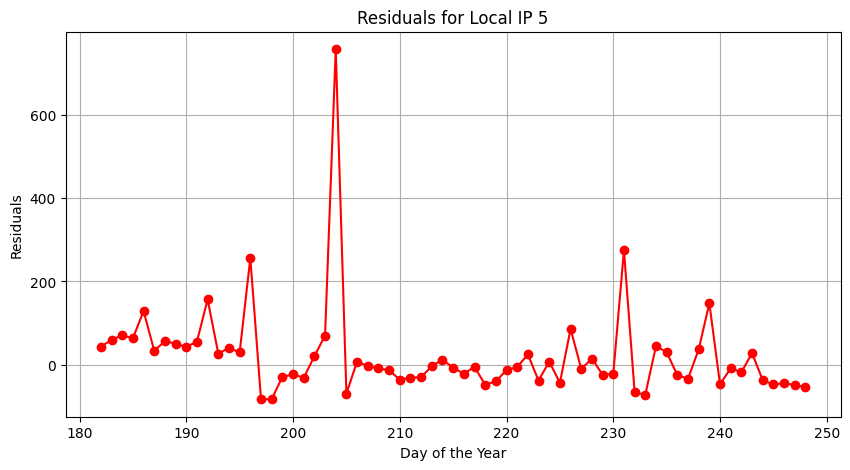

1/1 [==============================] - 0s 34ms/step


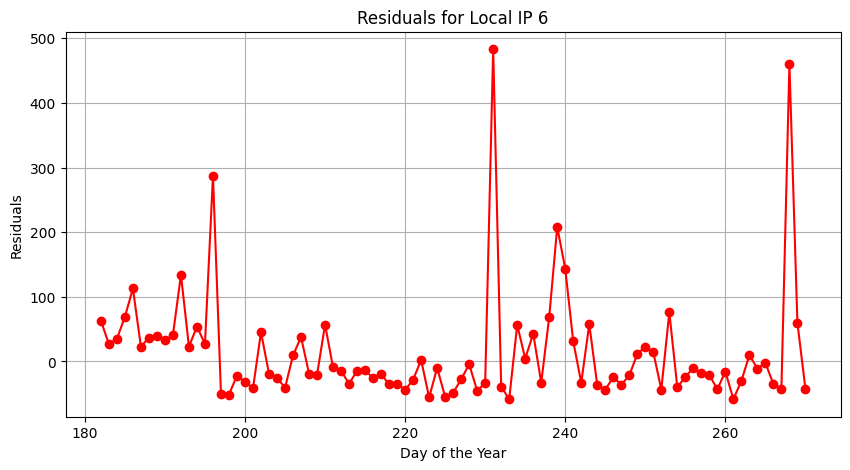

1/1 [==============================] - 0s 29ms/step


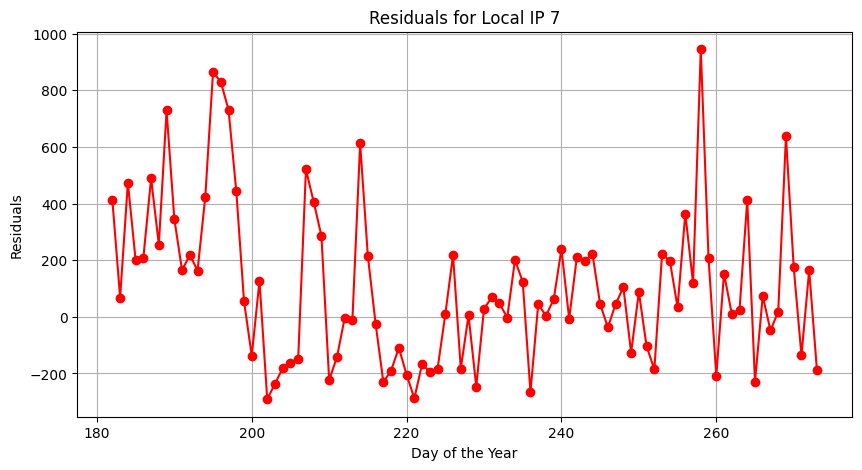

1/1 [==============================] - 0s 24ms/step


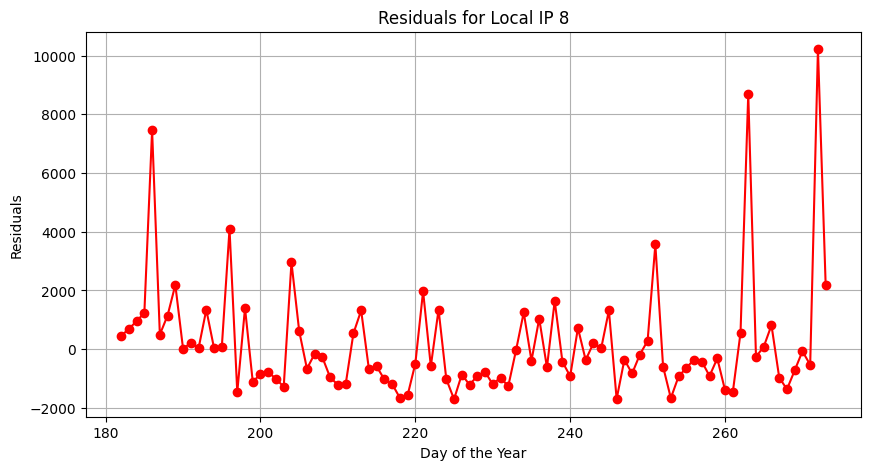

1/1 [==============================] - 0s 22ms/step


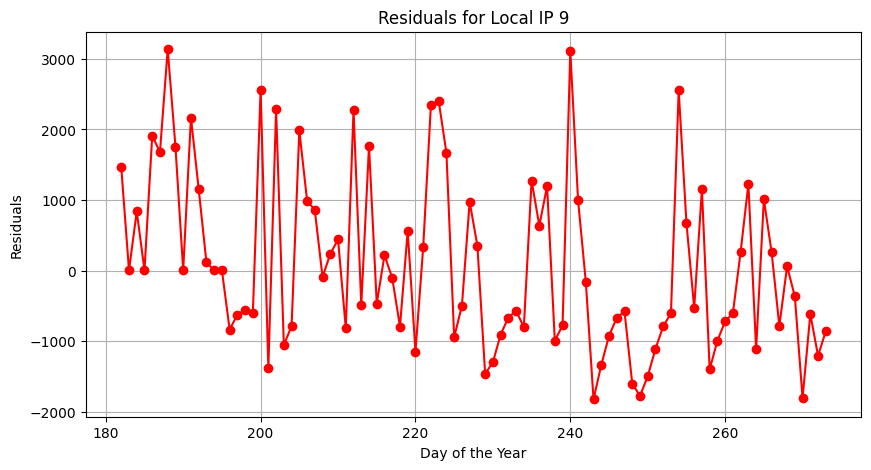

In [ ]:
for i, (model, ip_data, max_val) in enumerate(zip([m0, m1, m2, m3, m4, m5, m6, m7, m8, m9],
                                                  [ip0, ip1, ip2, ip3, ip4, ip5, ip6, ip7, ip8, ip9],
                                                  [max0, max1, max2, max3, max4, max5, max6, max7, max8, max9])):
    predicted_flow = np.multiply(predict_flow(model, ip_data[['f', 'wday']].copy(), look_back), max_val)
    actual_flow = np.multiply(ip_data['f'], max_val)

    residuals = actual_flow - predicted_flow

    plt.figure(figsize=(10, 5))
    plt.plot(ip_data['yday'], residuals, marker='o', linestyle='-', color='r')
    plt.title(f"Residuals for Local IP {i}")
    plt.xlabel("Day of the Year")
    plt.ylabel("Residuals")
    plt.grid(True)
    plt.show()

In [ ]:
def get_feature_importance(model):
    gru_layer_1_weights = model.layers[0].get_weights()[0]
    gru_layer_2_weights = model.layers[1].get_weights()[0]

    feature_importance = {
        'f': np.mean(np.abs(gru_layer_1_weights[:, 0])),
        'wday': np.mean(np.abs(gru_layer_1_weights[:, 1])),
    }

    return feature_importance

for i, model in enumerate([m0, m1, m2, m3, m4, m5, m6, m7, m8, m9]):
    feature_importance = get_feature_importance(model)
    print(f"Feature Importance for Local IP {i}:\n{feature_importance}")
    print("\n")


Feature Importance for Local IP 0:
{'f': 0.0053816023, 'wday': 0.06544041}


Feature Importance for Local IP 1:
{'f': 0.03728073, 'wday': 0.08635158}


Feature Importance for Local IP 2:
{'f': 0.08943578, 'wday': 0.08212001}


Feature Importance for Local IP 3:
{'f': 0.08328419, 'wday': 0.026400637}


Feature Importance for Local IP 4:
{'f': 0.058459144, 'wday': 0.16158155}


Feature Importance for Local IP 5:
{'f': 0.04493828, 'wday': 0.0666486}


Feature Importance for Local IP 6:
{'f': 0.018195493, 'wday': 0.081338026}


Feature Importance for Local IP 7:
{'f': 0.15923429, 'wday': 0.02967583}


Feature Importance for Local IP 8:
{'f': 0.09151216, 'wday': 0.07668199}


Feature Importance for Local IP 9:
{'f': 0.057195656, 'wday': 0.051182084}




1/1 [==============================] - 0s 26ms/step


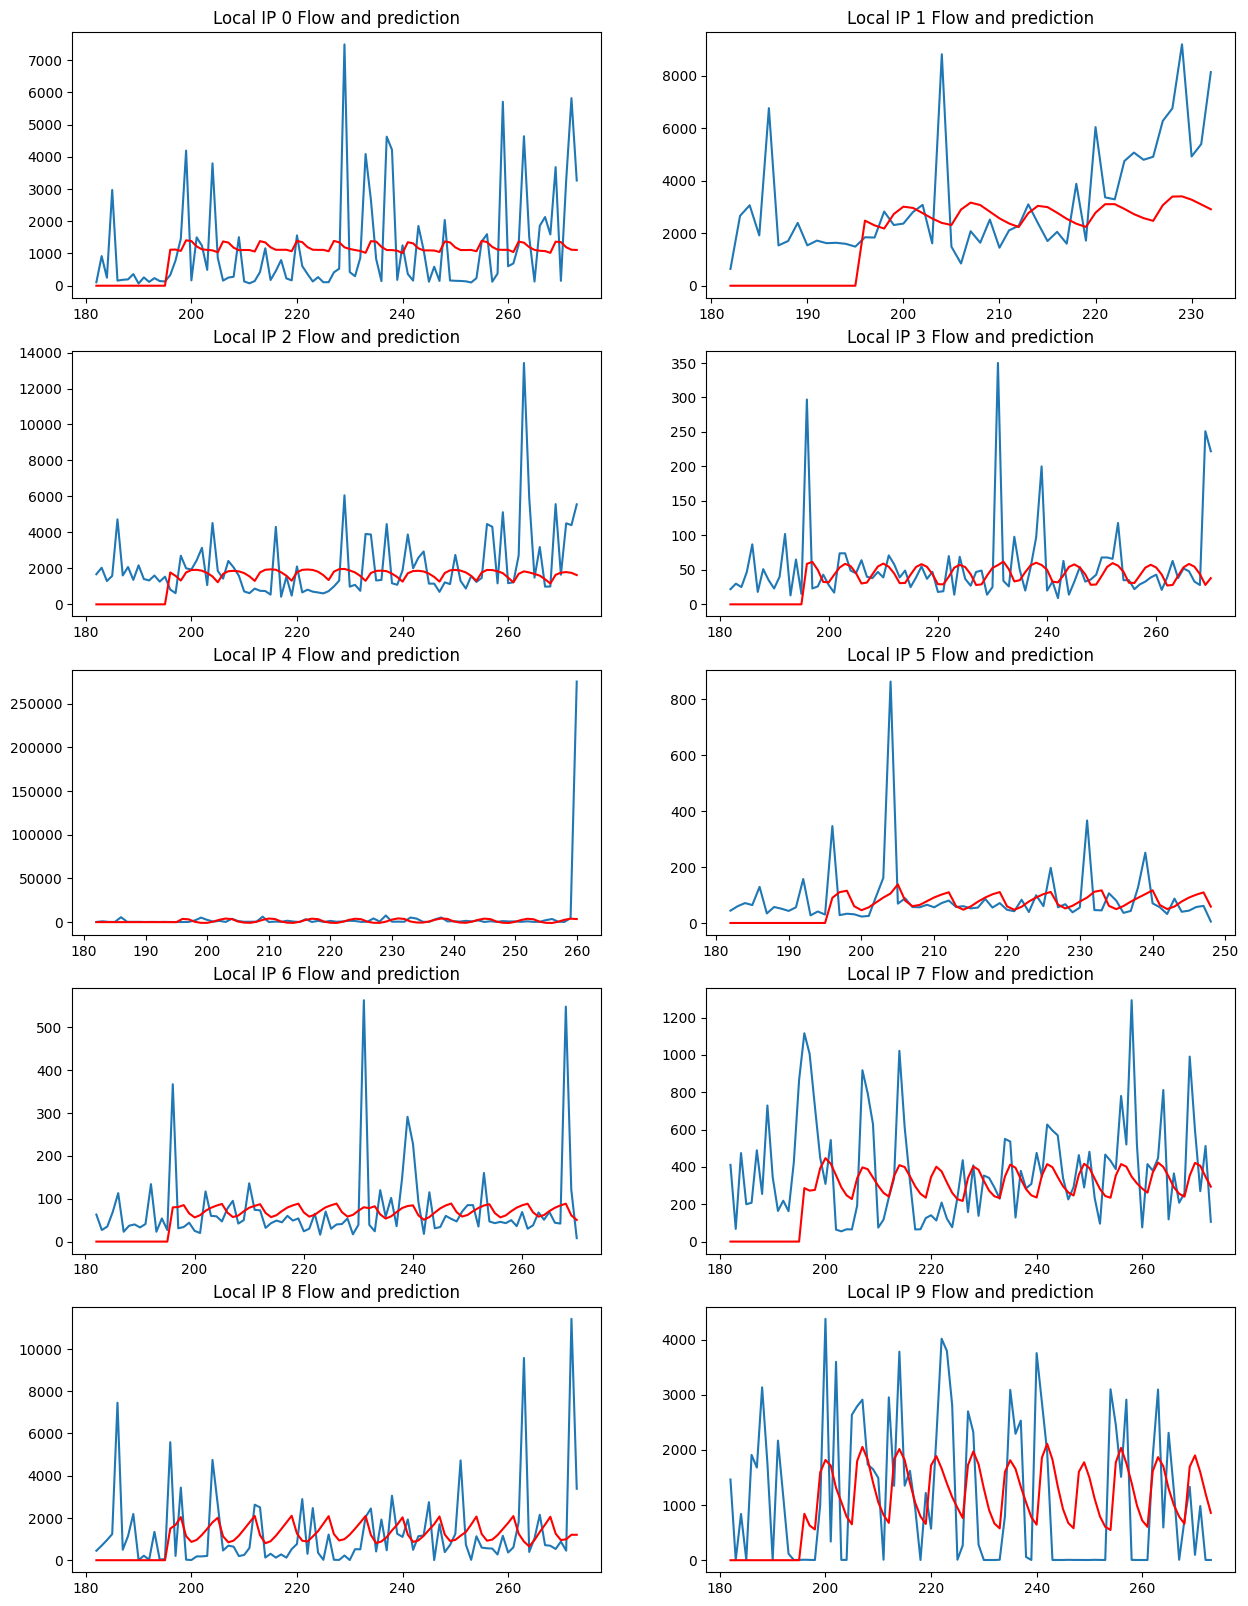

In [ ]:
f, axarray = plt.subplots(5, 2, figsize=(15, 20))

for i, (model, ip_data, max_val) in enumerate(zip([m0, m1, m2, m3, m4, m5, m6, m7, m8, m9],
                                                  [ip0, ip1, ip2, ip3, ip4, ip5, ip6, ip7, ip8, ip9],
                                                  [max0, max1, max2, max3, max4, max5, max6, max7, max8, max9])):
    predicted_flow = np.multiply(predict_flow(model, ip_data[['f', 'wday']].copy(), look_back), max_val)
    actual_flow = np.multiply(ip_data['f'], max_val)

    row = i // 2
    col = i % 2

    axarray[row, col].plot(ip_data['yday'], actual_flow)
    axarray[row, col].plot(ip_data['yday'], predicted_flow, color='r', alpha=1)
    axarray[row, col].set_title(f"Local IP {i} Flow and prediction")

plt.show()


In [ ]:
corr_list = []

for i, (ip_data, predicted_flow) in enumerate(zip([ip0f, ip1f, ip2f, ip3f, ip4f, ip5f, ip6f, ip7f, ip8f, ip9f],
                                                  [ypred0, ypred1, ypred2, ypred3, ypred4, ypred5, ypred6, ypred7, ypred8, ypred9])):
    correlation = pd.Series(ip_data).corr(pd.Series(predicted_flow))
    corr_list.append(correlation)

corrdf = pd.DataFrame({'corr': corr_list})
corrdf.head(10)


corr
0 -0.066467
1  0.584425
2  0.195439
3  0.457784
4 -0.080570
5  0.057071
6 -0.346318
7 -0.274118
8  0.138320
9 -0.444840

In [ ]:
ip0 = df[df['l_ipn'] == 0].copy()
ip1 = df[df['l_ipn'] == 1].iloc[:-5].copy()
ip2 = df[df['l_ipn'] == 2].copy()
ip3 = df[df['l_ipn'] == 3].copy()
ip4 = df[df['l_ipn'] == 4].iloc[:-7].copy()
ip5 = df[df['l_ipn'] == 5].copy()
ip6 = df[df['l_ipn'] == 6].copy()
ip7 = df[df['l_ipn'] == 7].copy()
ip8 = df[df['l_ipn'] == 8].copy()
ip9 = df[df['l_ipn'] == 9].copy()


In [ ]:
def ApEn(U, m, r):

    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)

    return abs(_phi(m + 1) - _phi(m))

In [ ]:
m = 2
r = 3

e_values = [ApEn(np.multiply(ip['f'].values, 1), m, r) for ip in [ip0, ip1, ip2, ip3, ip4, ip5, ip6, ip7, ip8, ip9]]
e_dict = {f"e{i}": e for i, e in enumerate(e_values)}

e0, e1, e2, e3, e4, e5, e6, e7, e8, e9 = e_values


In [ ]:
ent_values = pd.DataFrame({'e{}'.format(i): [e] for i, e in enumerate(e_values)})
ent_values.head()


e0        e1       e2        e3        e4        e5        e6  \
0  0.01105  0.020203  0.01105  0.360497  0.012903  0.169414  0.286478   

         e7       e8        e9  
0  0.004184  0.01105  0.264248

In [ ]:
def entropy_trend(data, d, m=2, r=3):
    etrend = [ApEn(np.multiply(data[n:n+d].values, 1), m, r) for n in range(len(data) - d)]
    return etrend


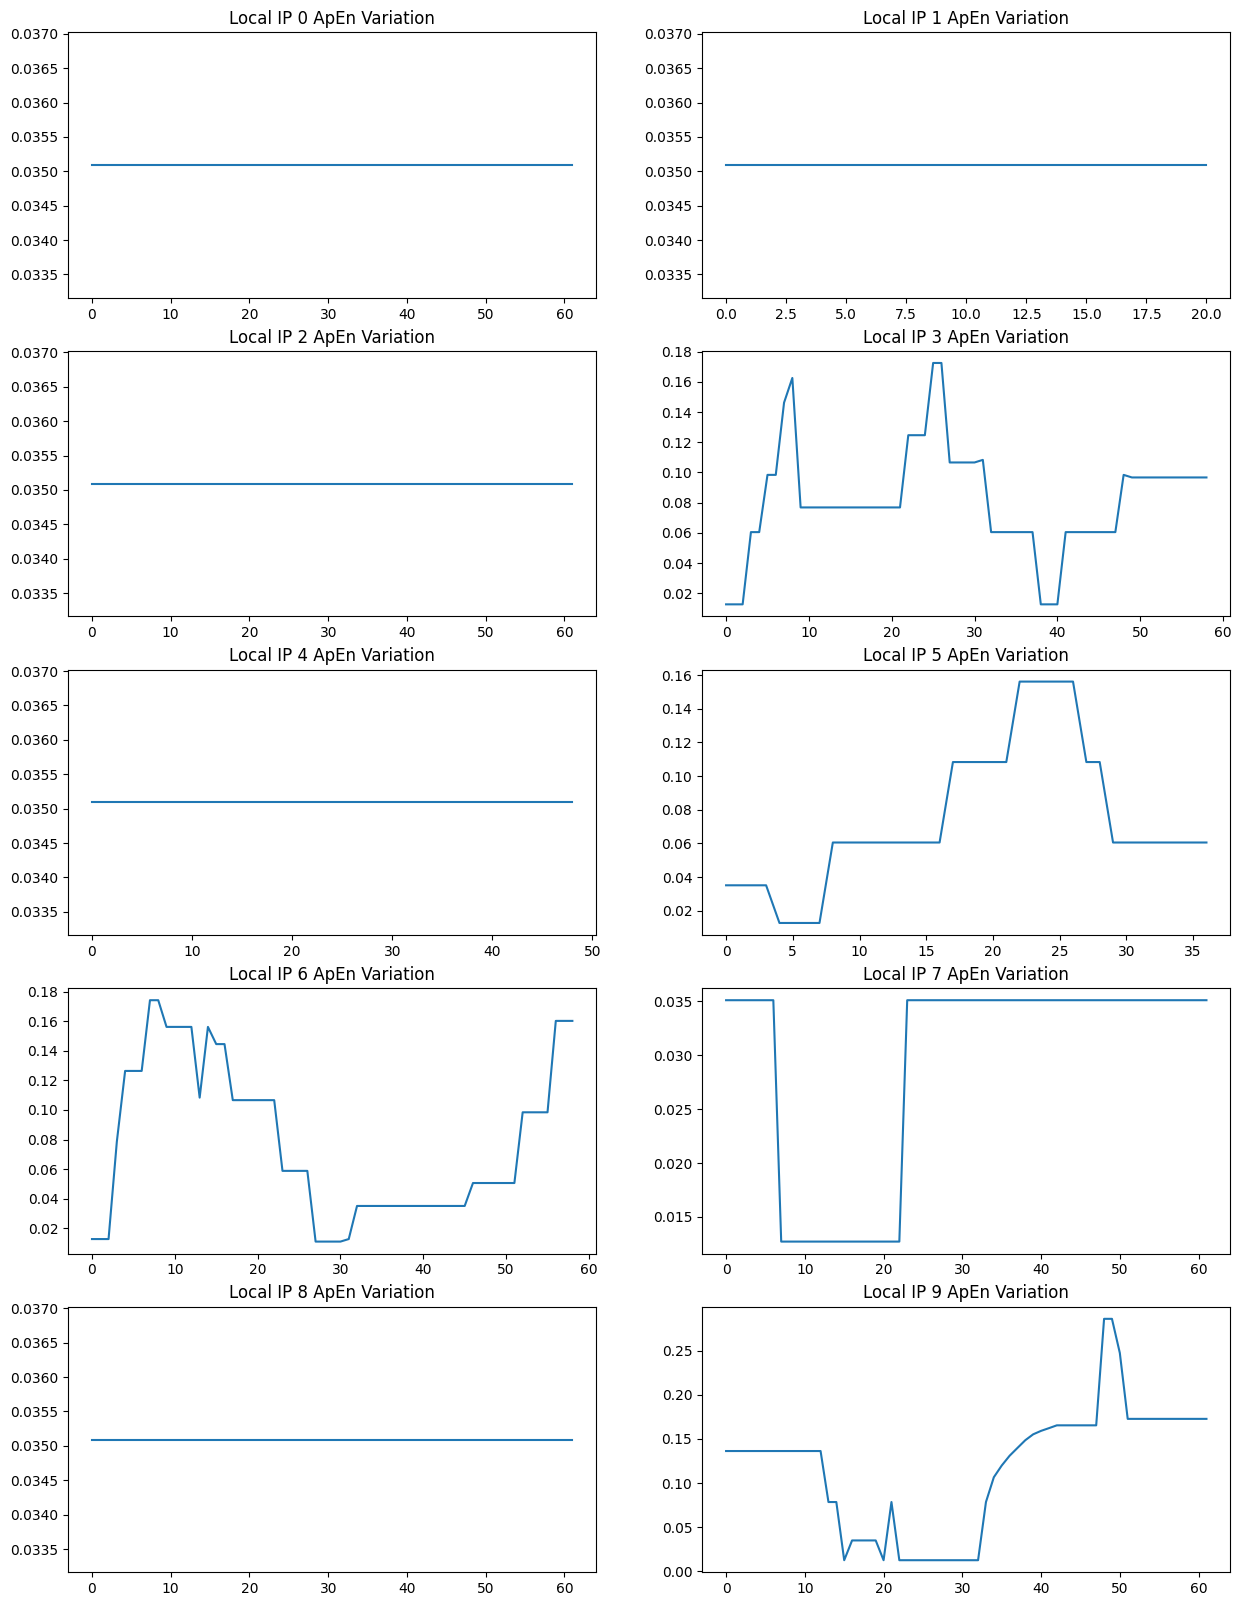

In [ ]:
f, axarray = plt.subplots(5, 2, figsize=(15, 20))
days = 30

for i, ip_data in enumerate([ip0, ip1, ip2, ip3, ip4, ip5, ip6, ip7, ip8, ip9]):
    et = entropy_trend(ip_data['f'], days)
    axarray[i // 2, i % 2].plot(range(len(et)), et)
    axarray[i // 2, i % 2].set_title(f"Local IP {i} ApEn Variation")

plt.show()


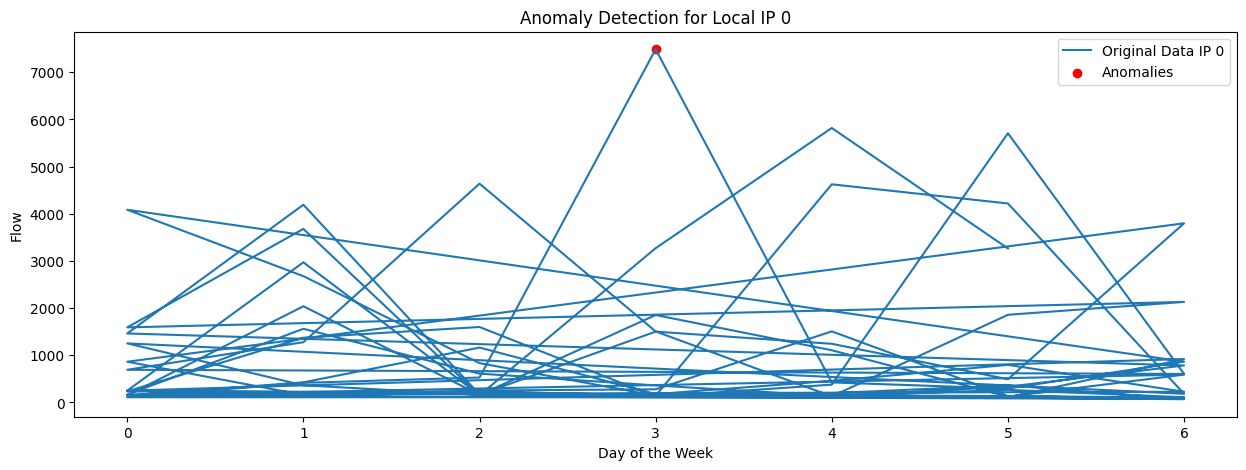

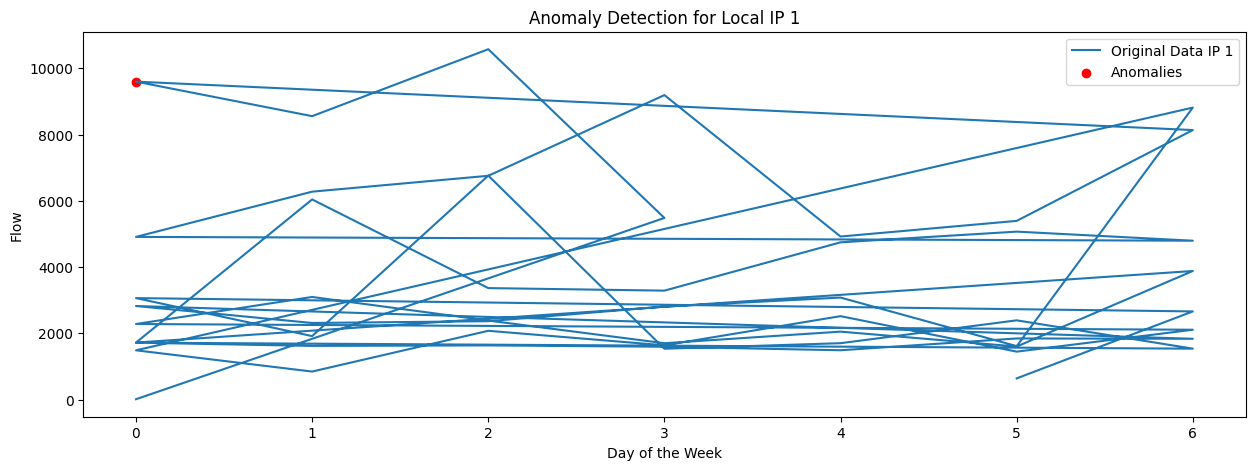

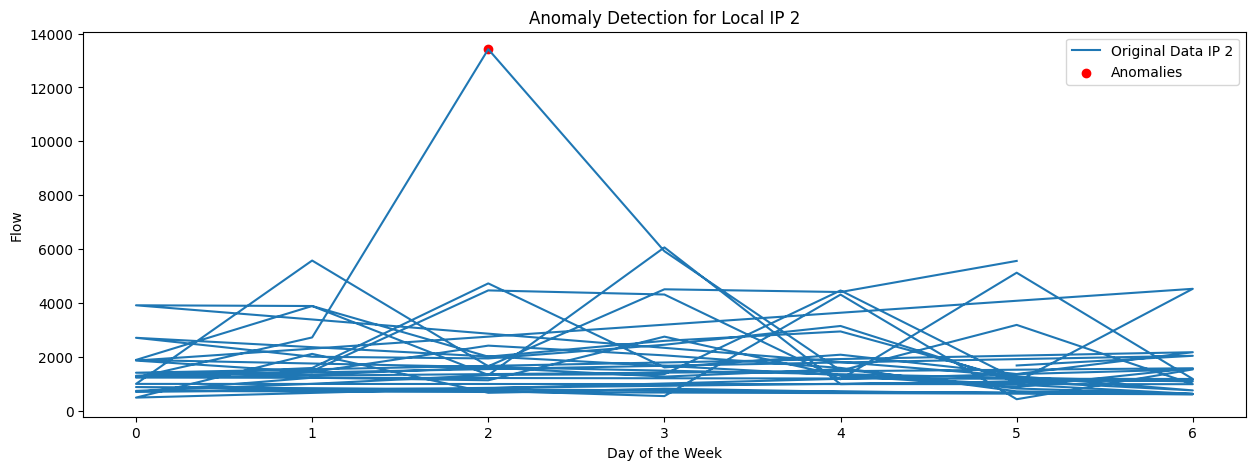

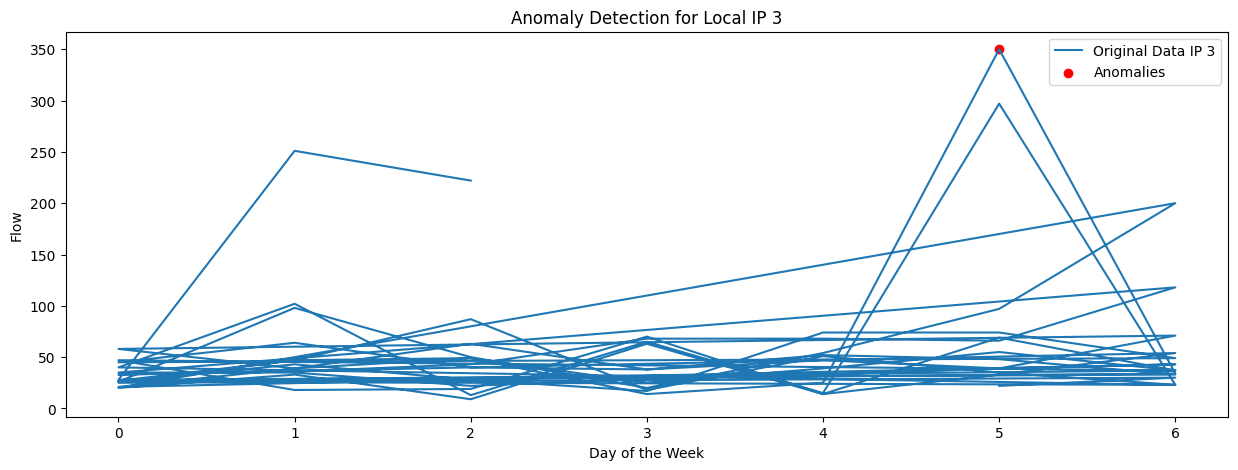

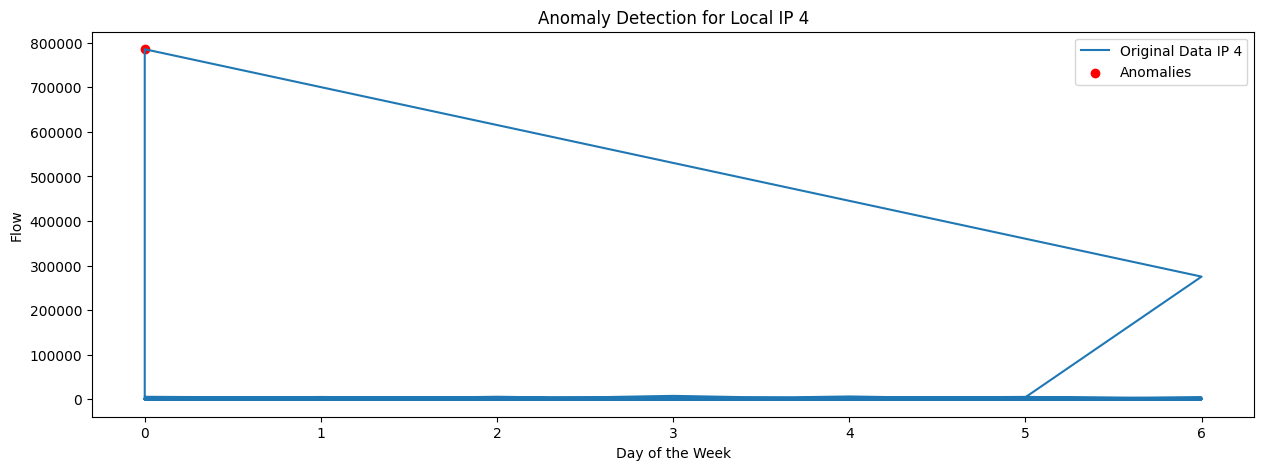

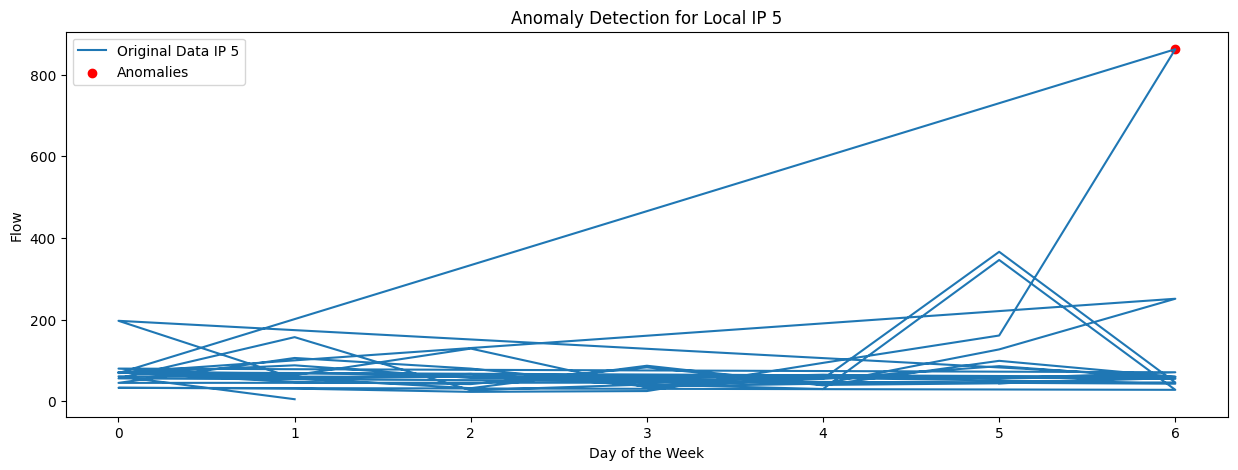

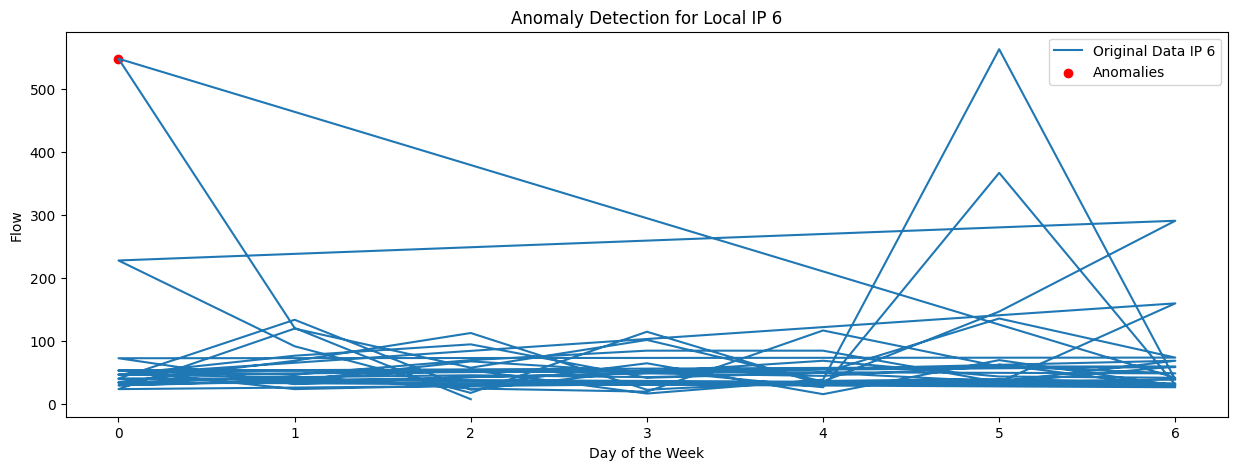

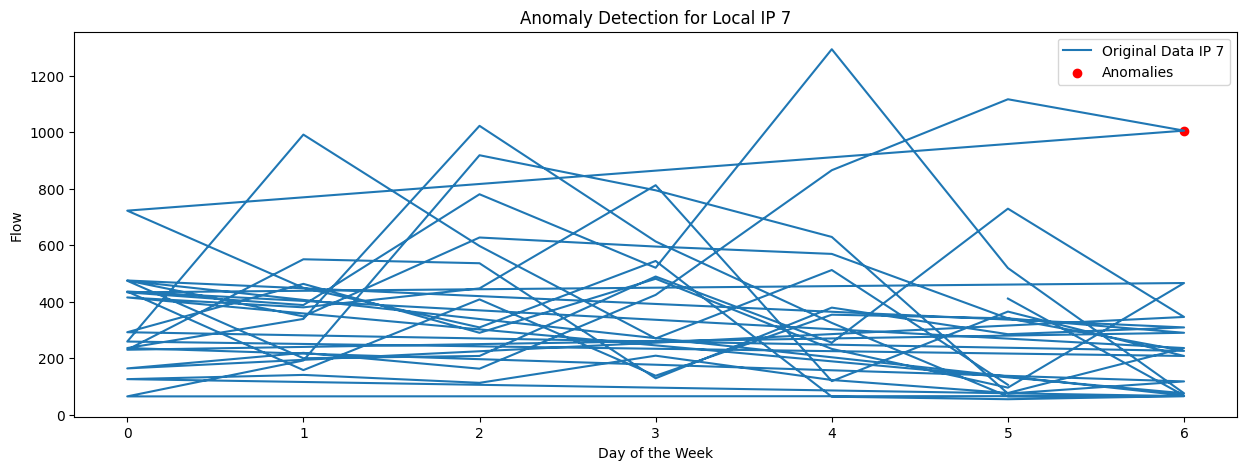

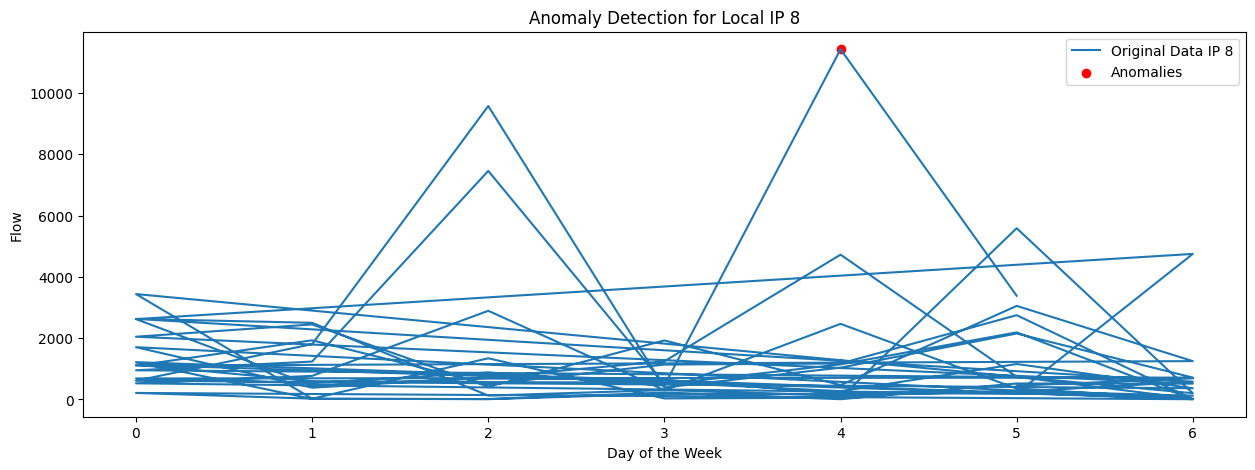

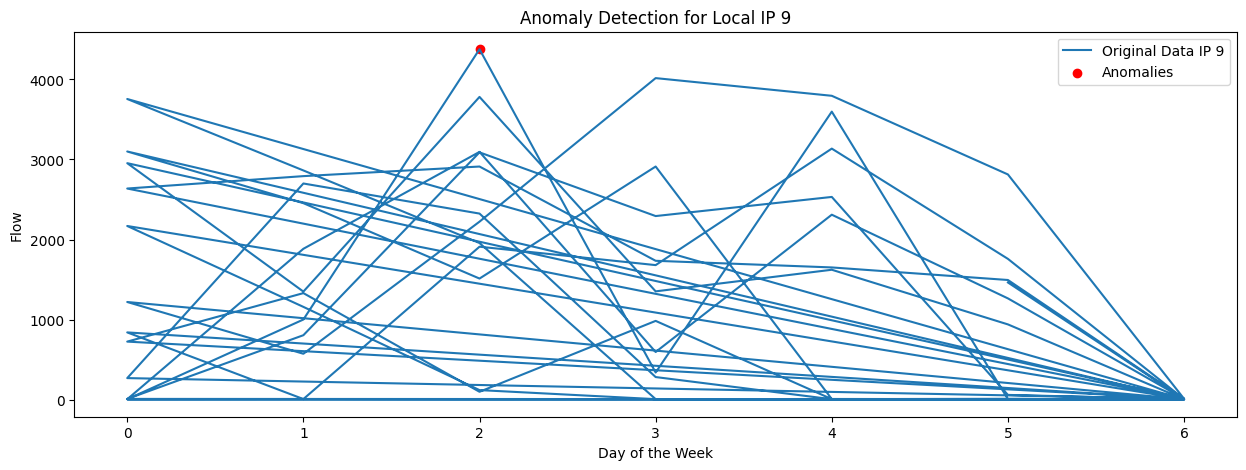

In [ ]:
def detect_anomalies(data, feature_column='f', contamination=0.01):
    model = IsolationForest(contamination=contamination, random_state=42)
    data[feature_column] = data[feature_column].astype('float32')

    X = data[[feature_column, 'wday']].values
    predictions = model.fit_predict(X)

    data['anomaly'] = predictions
    anomalies = data[data['anomaly'] == -1]

    return anomalies

for i in range(10):
    ip_data = df[df['l_ipn'] == i].copy()
    anomalies_ip = detect_anomalies(ip_data[['f', 'wday']].copy())

    plt.figure(figsize=(15, 5))
    plt.plot(ip_data['wday'], ip_data['f'], label=f'Original Data IP {i}')
    plt.scatter(anomalies_ip['wday'], anomalies_ip['f'], color='red', label='Anomalies')
    plt.title(f"Anomaly Detection for Local IP {i}")
    plt.xlabel("Day of the Week")
    plt.ylabel("Flow")
    plt.legend()
    plt.show()

Decomposition for Local IP 0


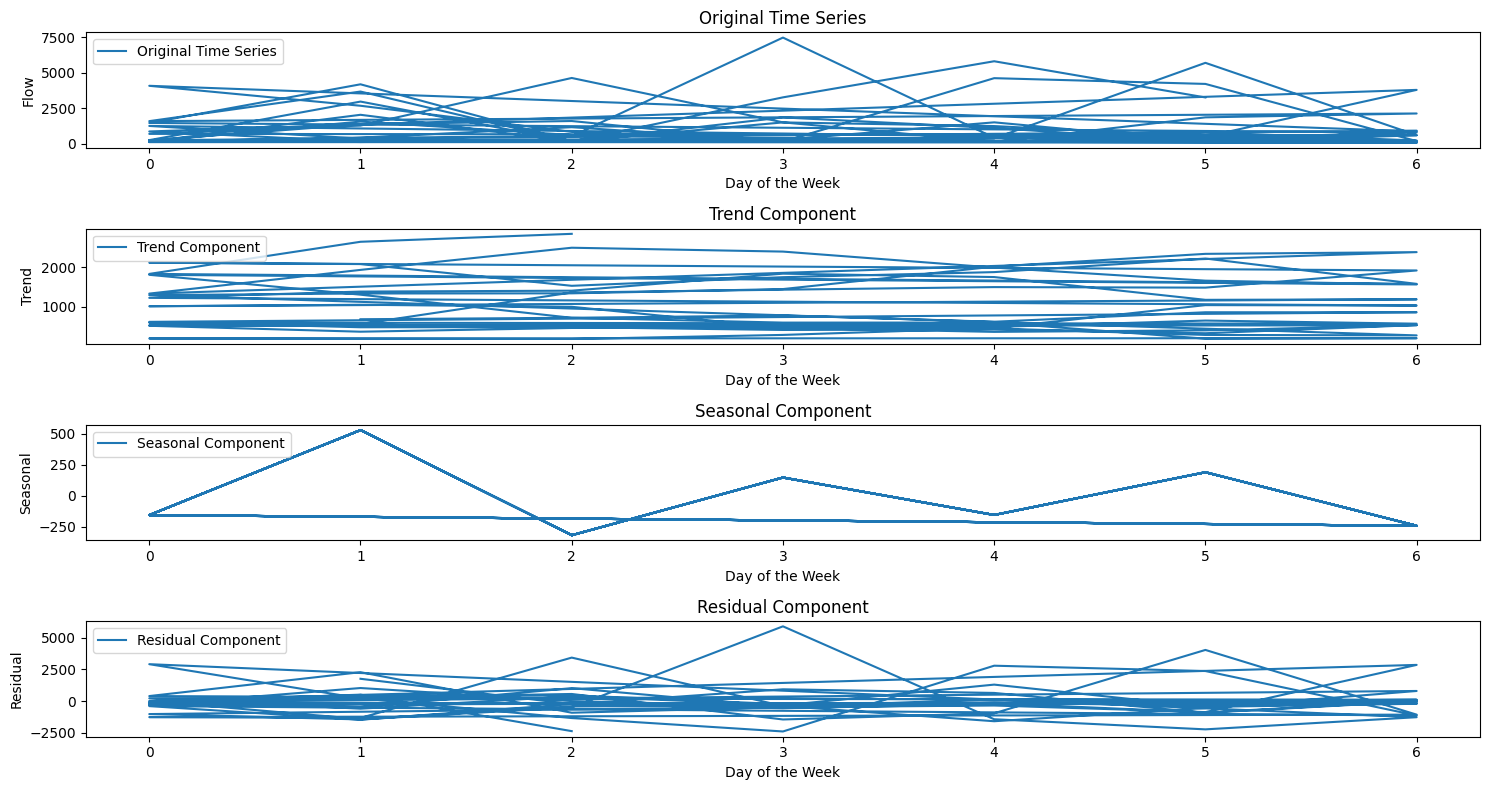

Decomposition for Local IP 1


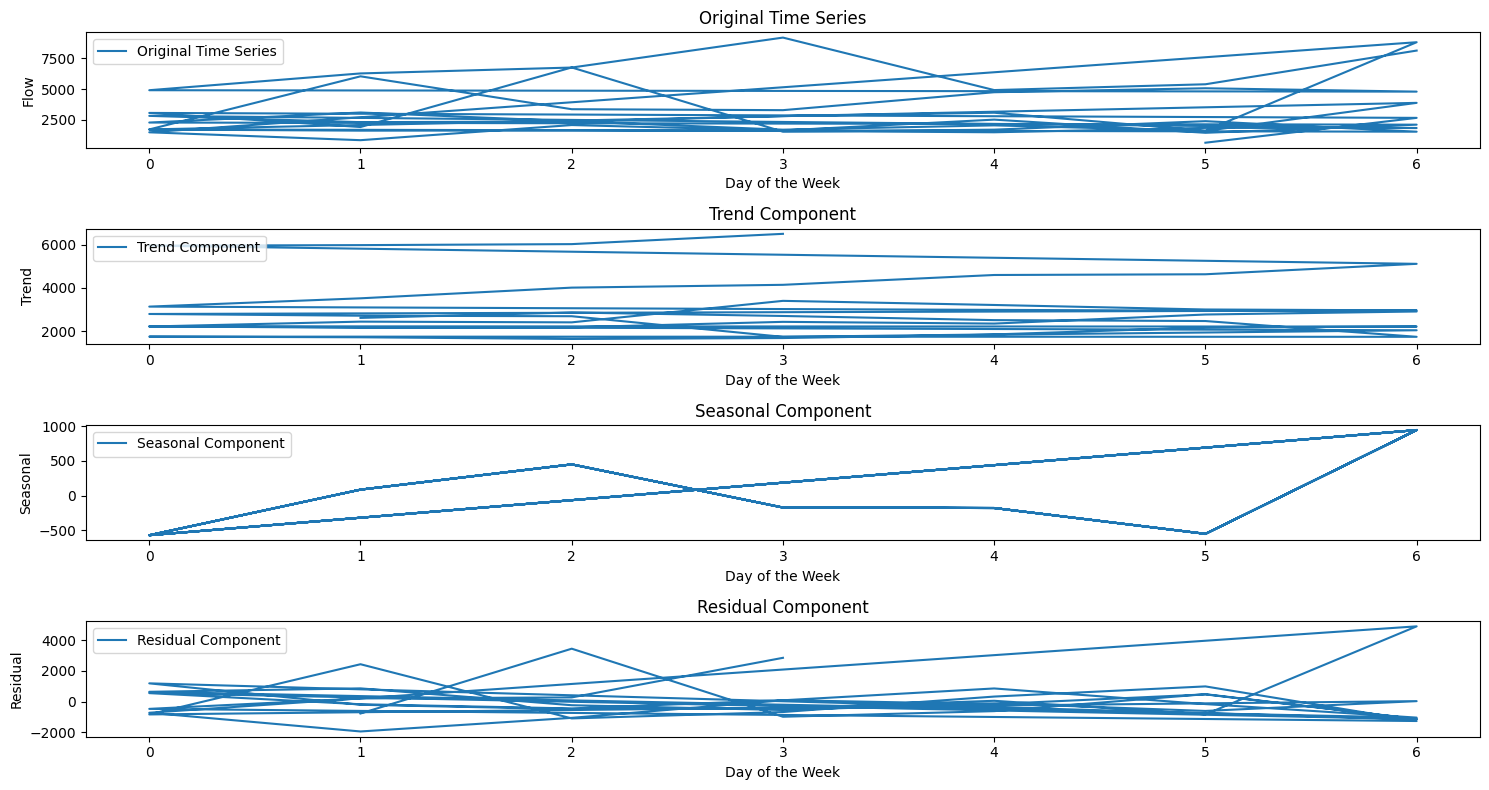

Decomposition for Local IP 2


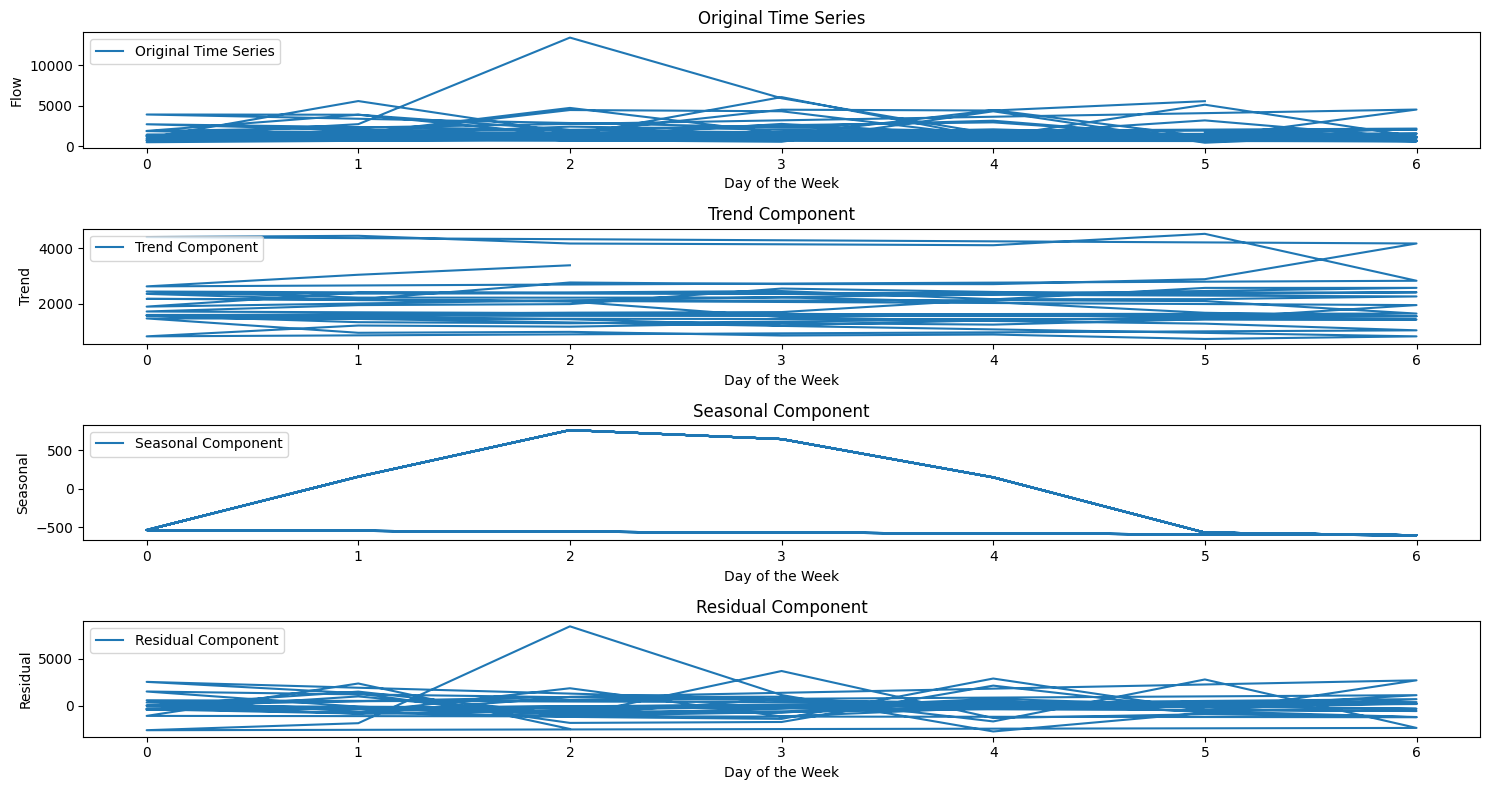

Decomposition for Local IP 3


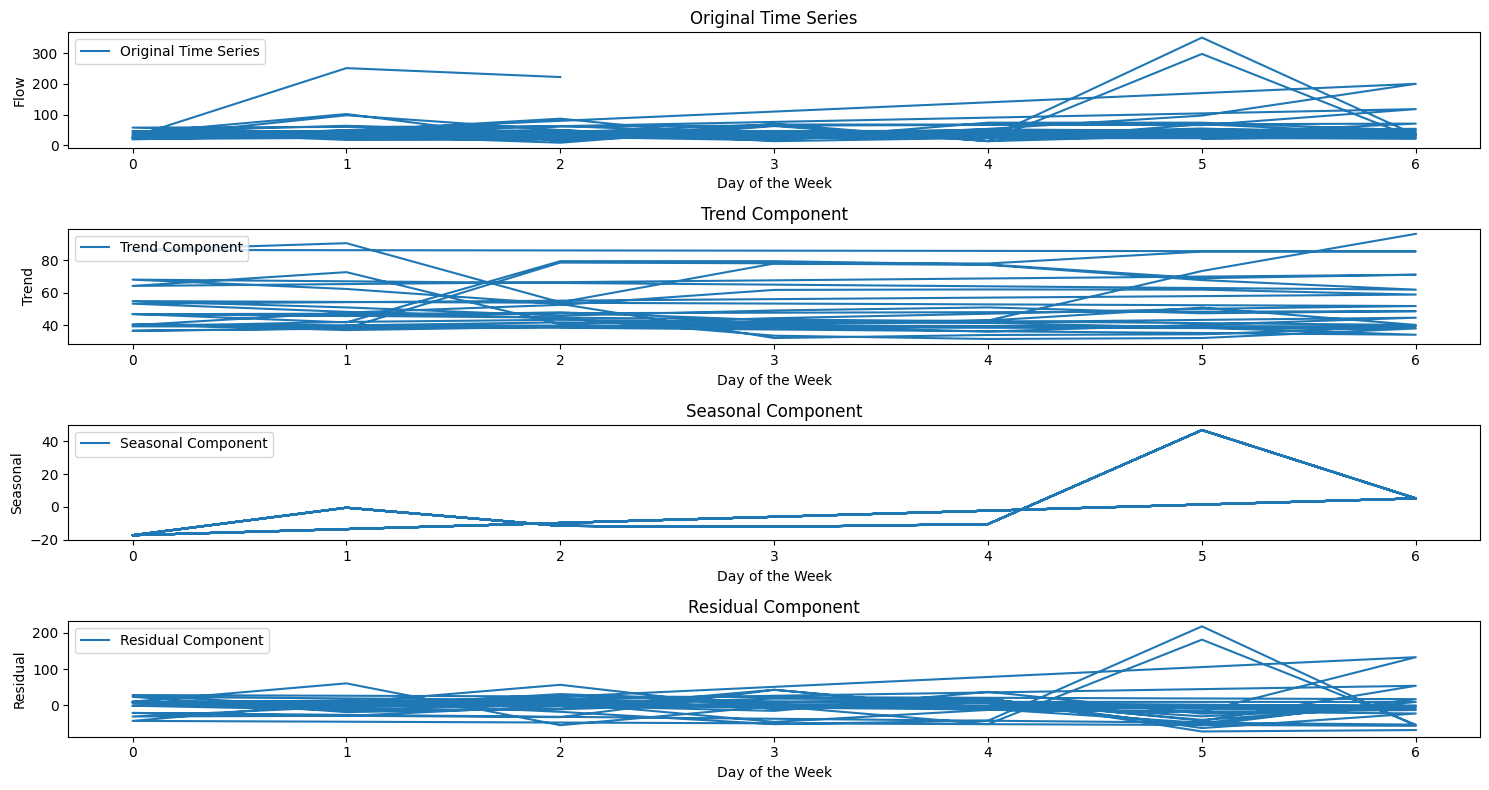

Decomposition for Local IP 4


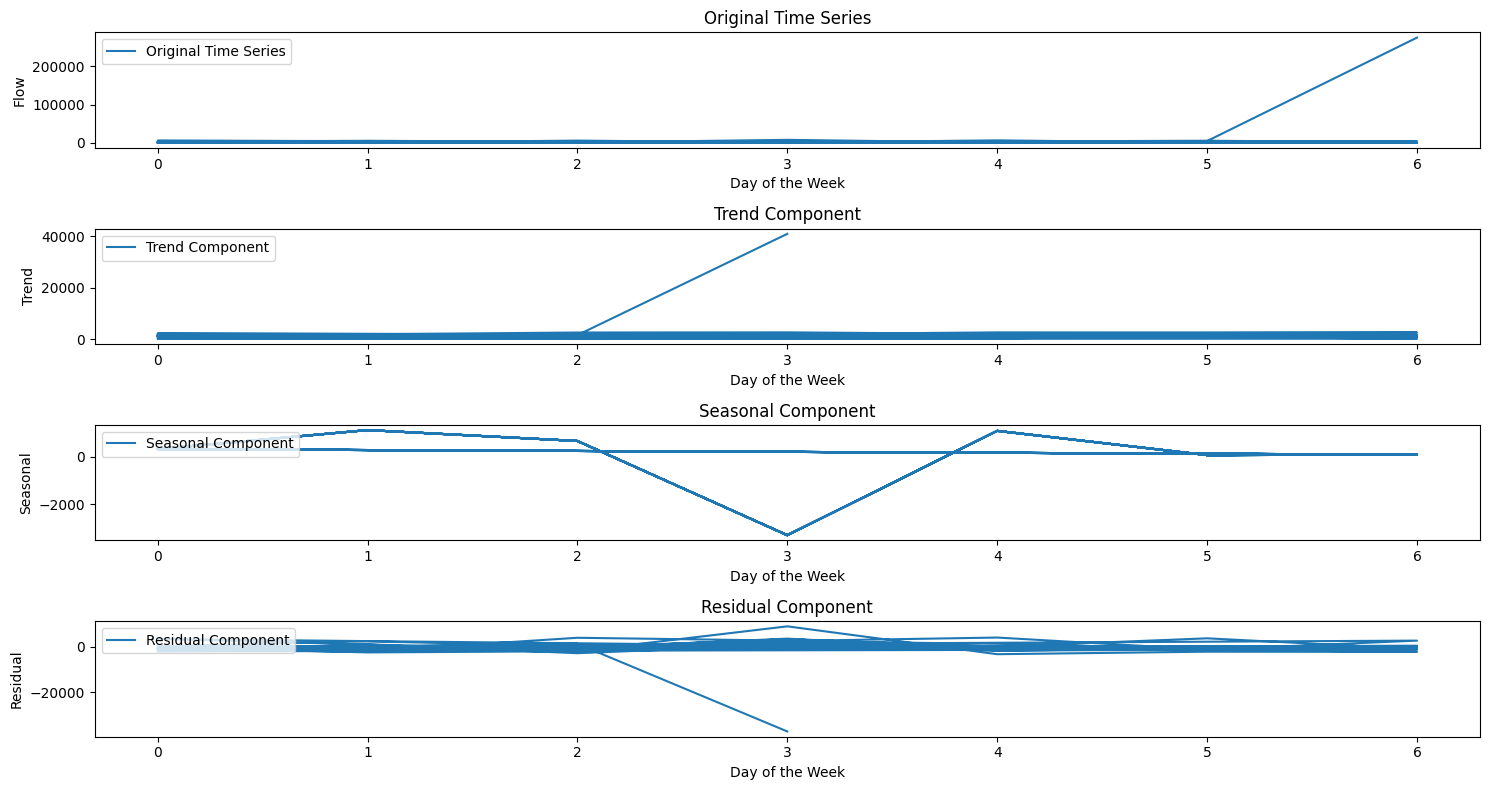

Decomposition for Local IP 5


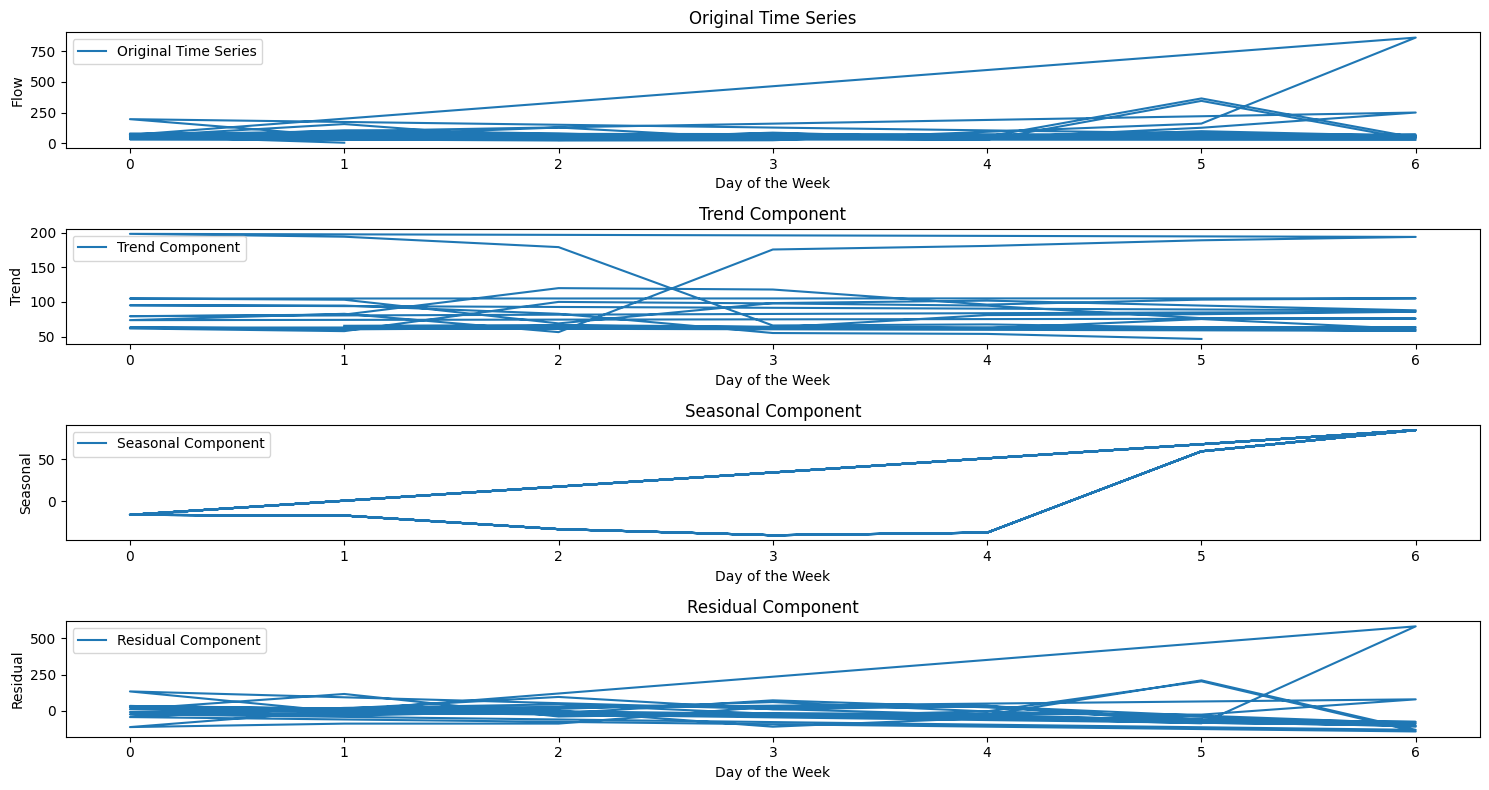

Decomposition for Local IP 6


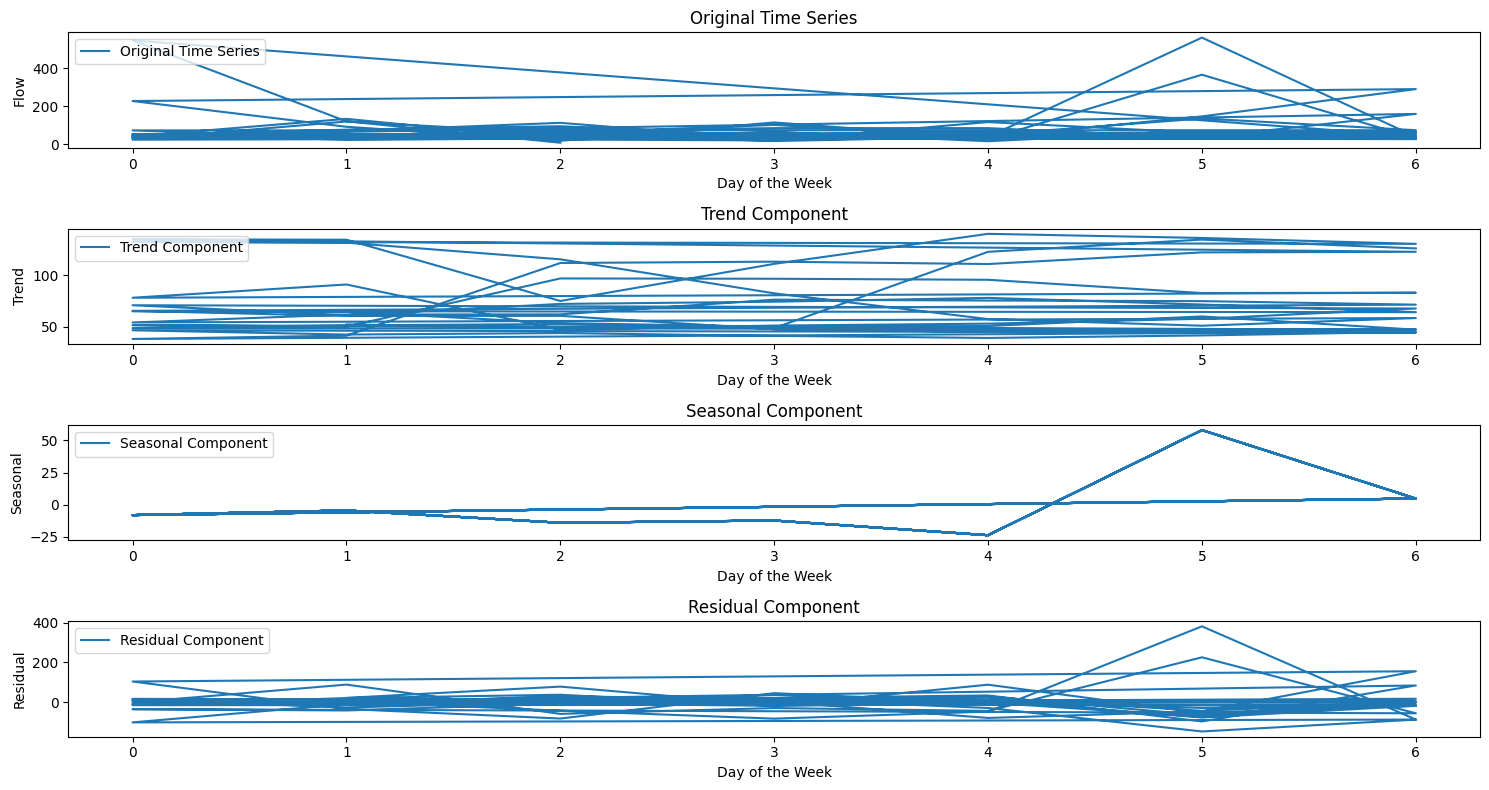

Decomposition for Local IP 7


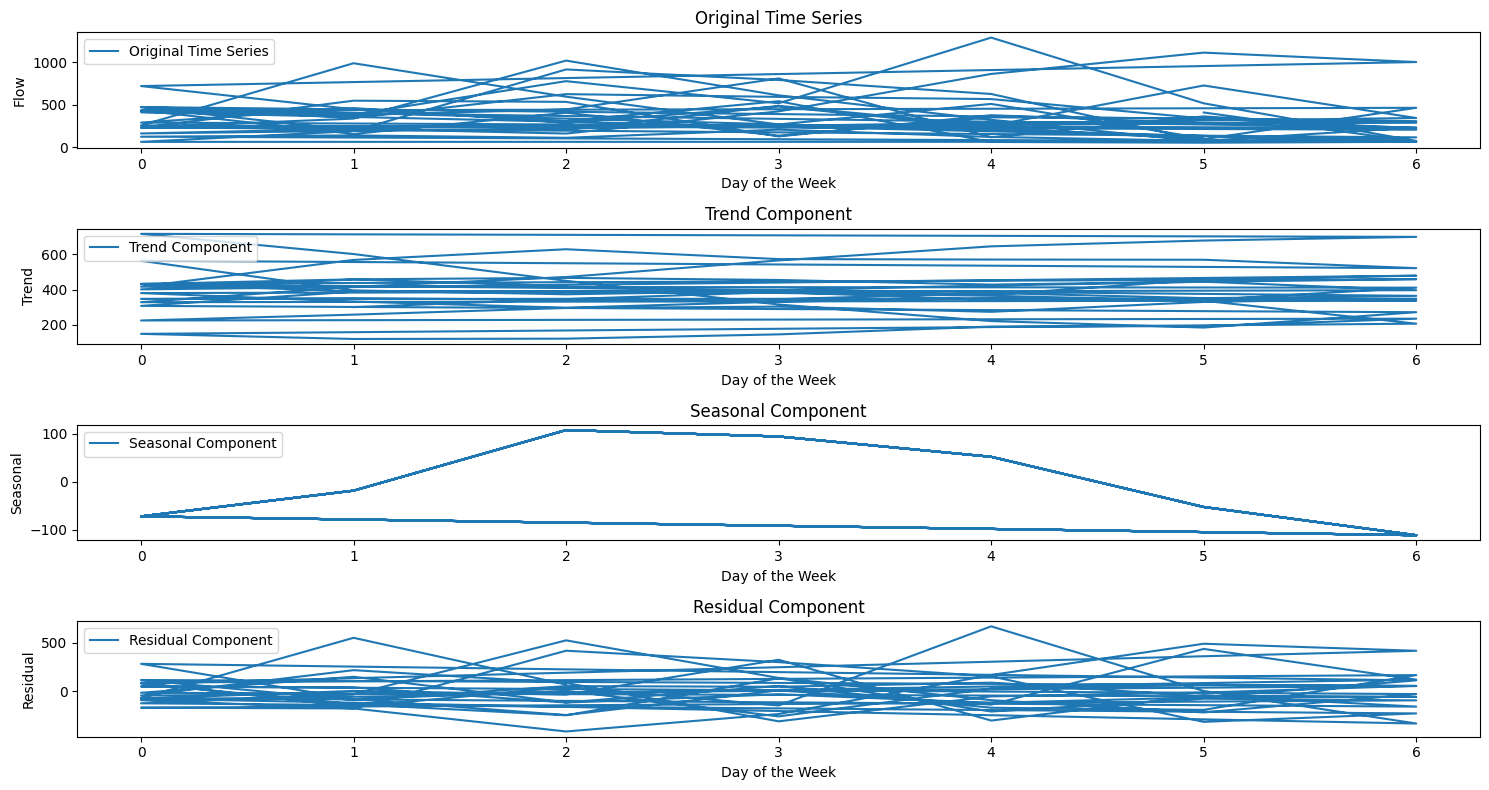

Decomposition for Local IP 8


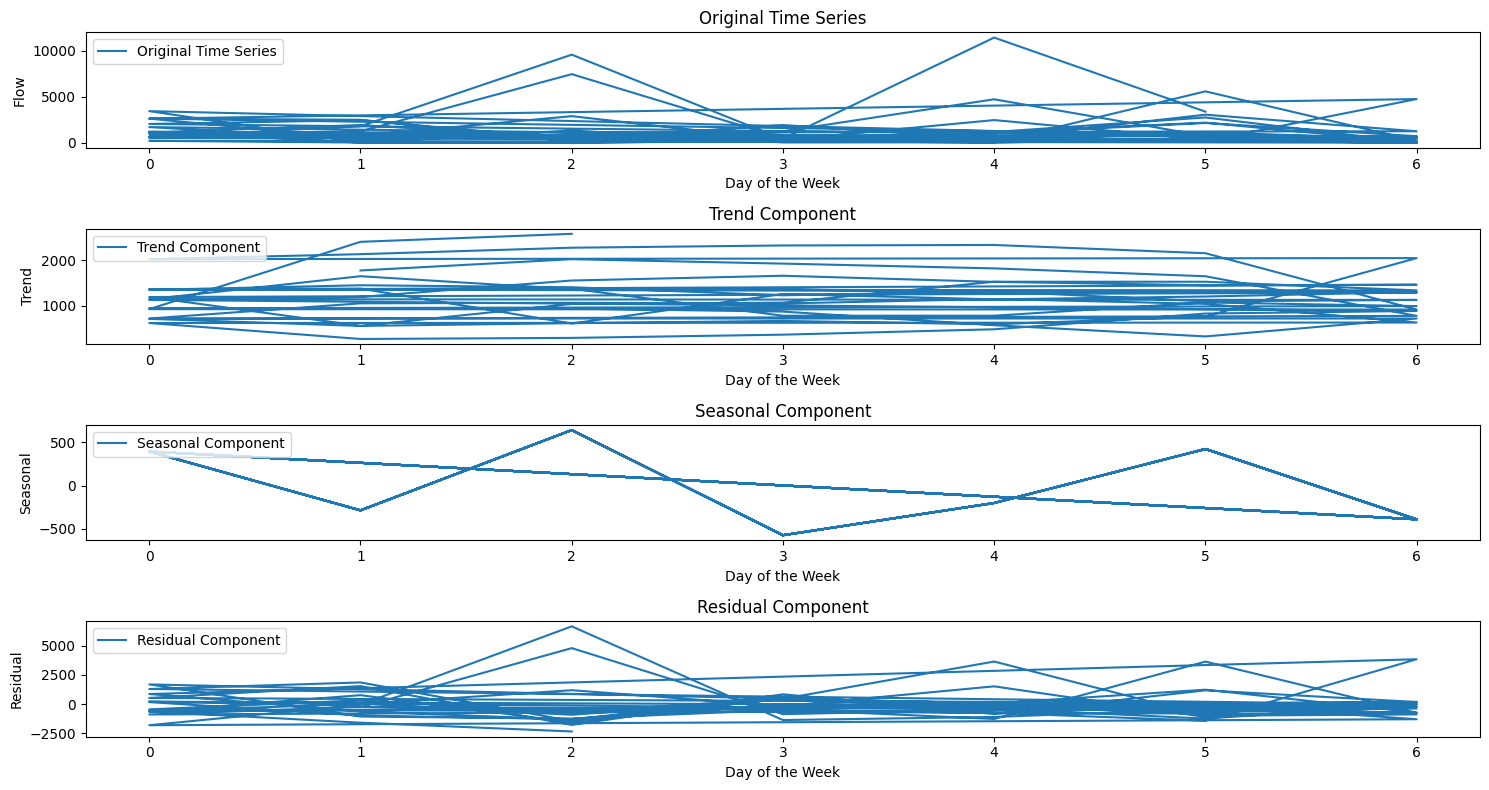

Decomposition for Local IP 9


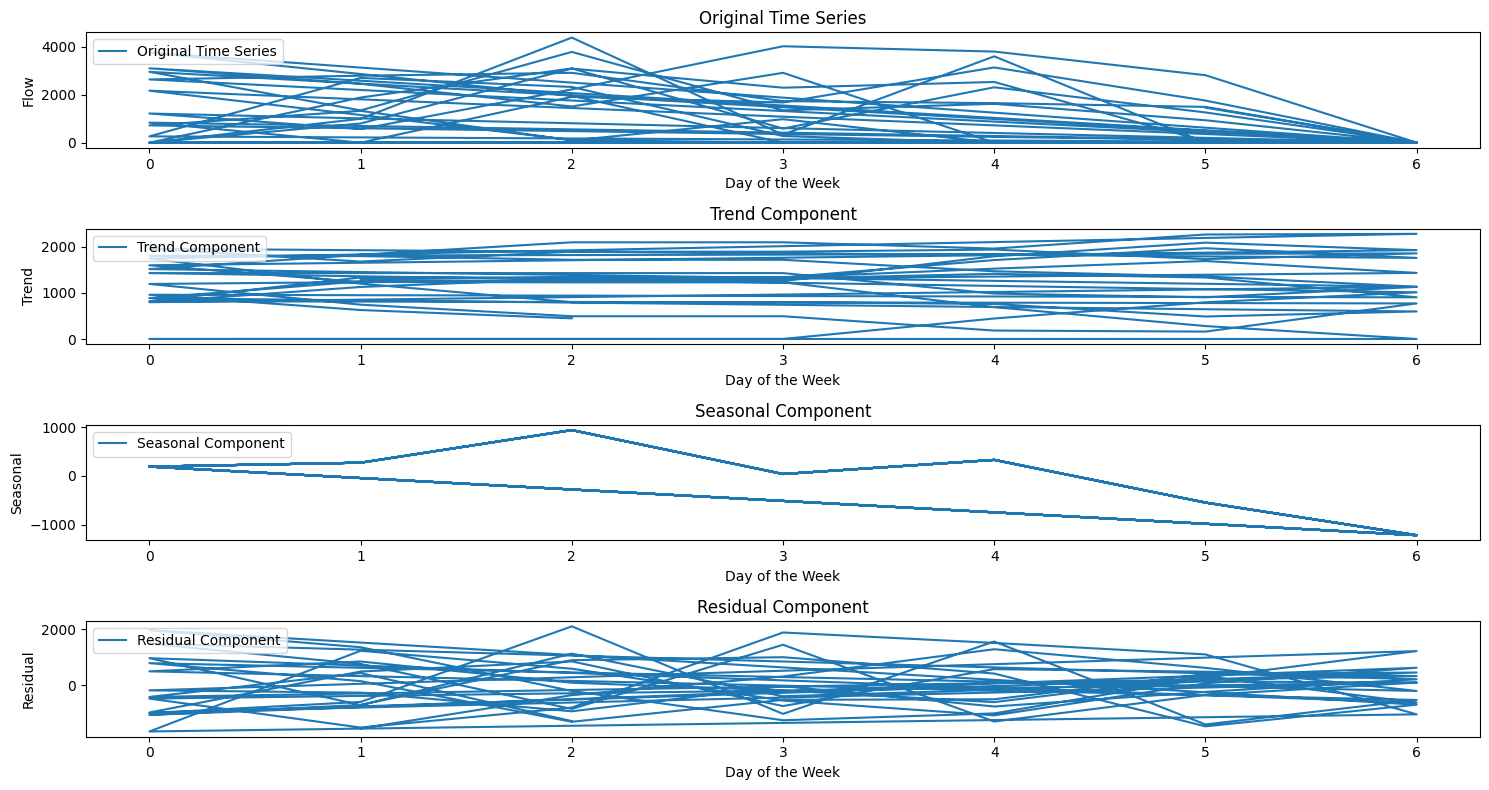

In [ ]:
def decompose_time_series(data, feature_column='f', period=7):
    data[feature_column] = data[feature_column].astype('float32')

    result = seasonal_decompose(data[feature_column], period=period)

    plt.figure(figsize=(15, 8))

    # Original Time Series
    plt.subplot(411)
    plt.plot(data['wday'], data[feature_column], label='Original Time Series')
    plt.legend(loc='upper left')
    plt.xlabel('Day of the Week')
    plt.ylabel('Flow')
    plt.title('Original Time Series')

    # Trend Component
    plt.subplot(412)
    plt.plot(data['wday'], result.trend, label='Trend Component')
    plt.legend(loc='upper left')
    plt.xlabel('Day of the Week')
    plt.ylabel('Trend')
    plt.title('Trend Component')

    # Seasonal Component
    plt.subplot(413)
    plt.plot(data['wday'], result.seasonal, label='Seasonal Component')
    plt.legend(loc='upper left')
    plt.xlabel('Day of the Week')
    plt.ylabel('Seasonal')
    plt.title('Seasonal Component')

    # Residual Component
    plt.subplot(414)
    plt.plot(data['wday'], result.resid, label='Residual Component')
    plt.legend(loc='upper left')
    plt.xlabel('Day of the Week')
    plt.ylabel('Residual')
    plt.title('Residual Component')

    plt.tight_layout()

    plt.show()

for i, ip_data in enumerate([ip0, ip1, ip2, ip3, ip4, ip5, ip6, ip7, ip8, ip9]):
    print(f"Decomposition for Local IP {i}")
    decompose_time_series(ip_data[['f', 'wday']].copy())


Clustering for Local IP 0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


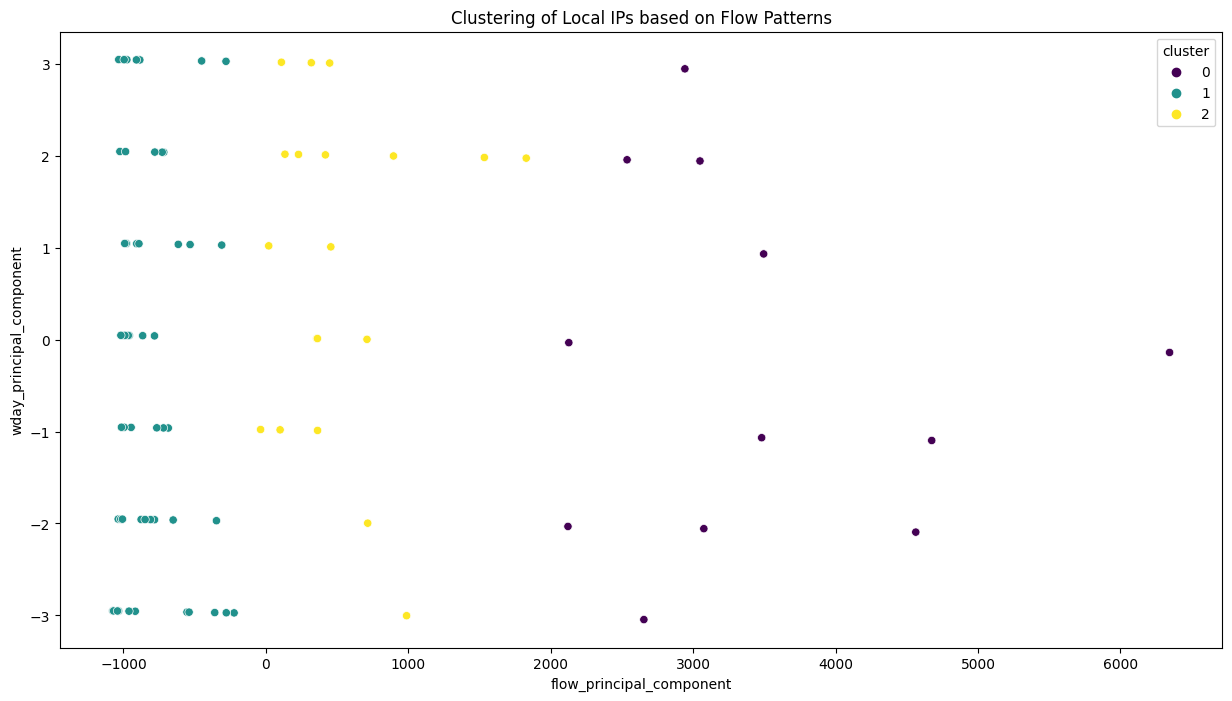

Clustering for Local IP 1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


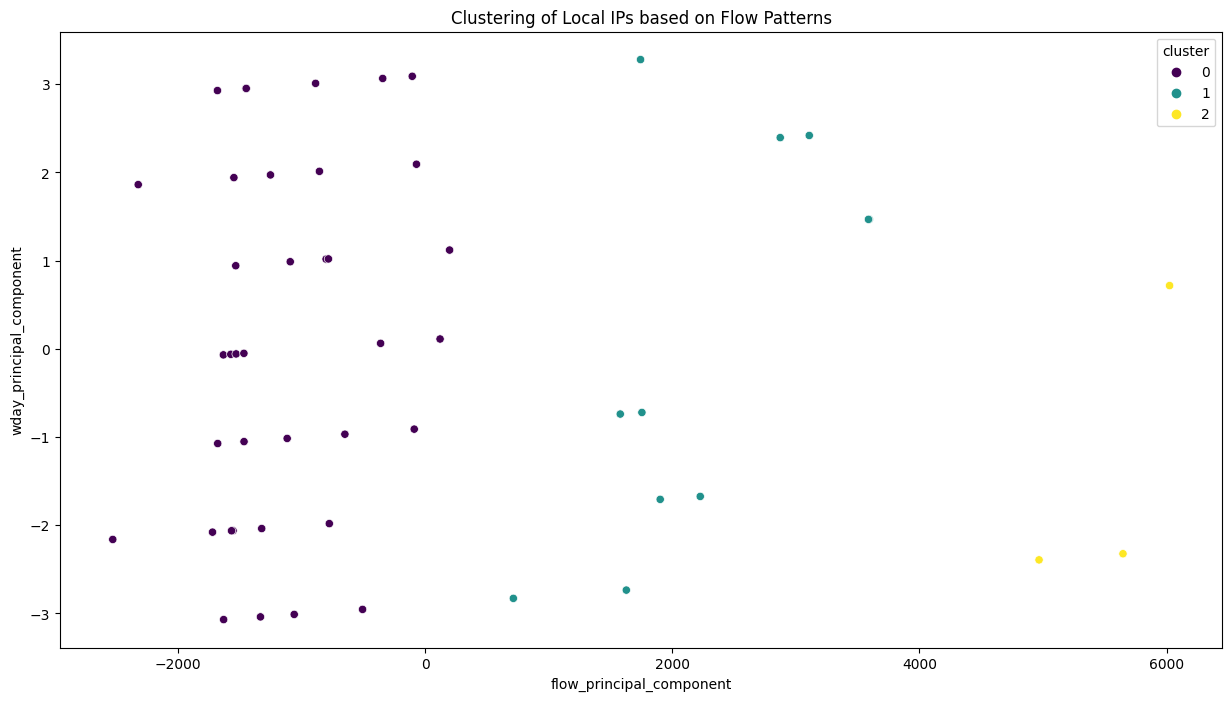

Clustering for Local IP 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


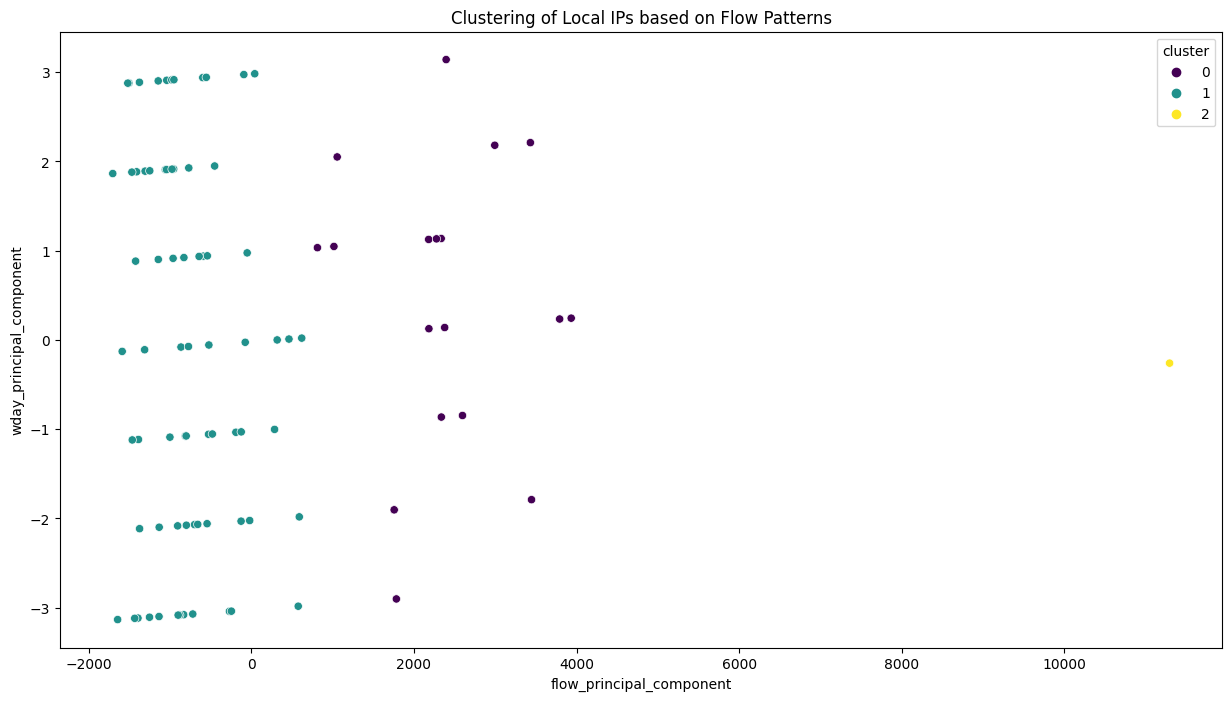

Clustering for Local IP 3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


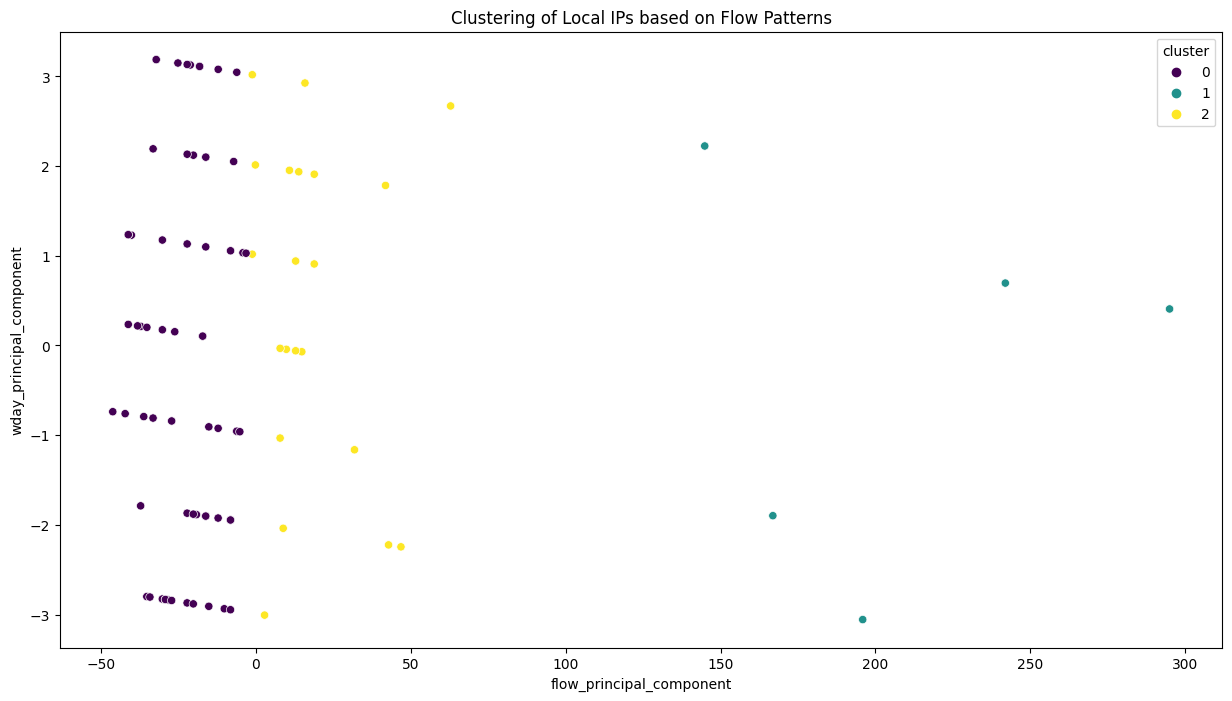

Clustering for Local IP 4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


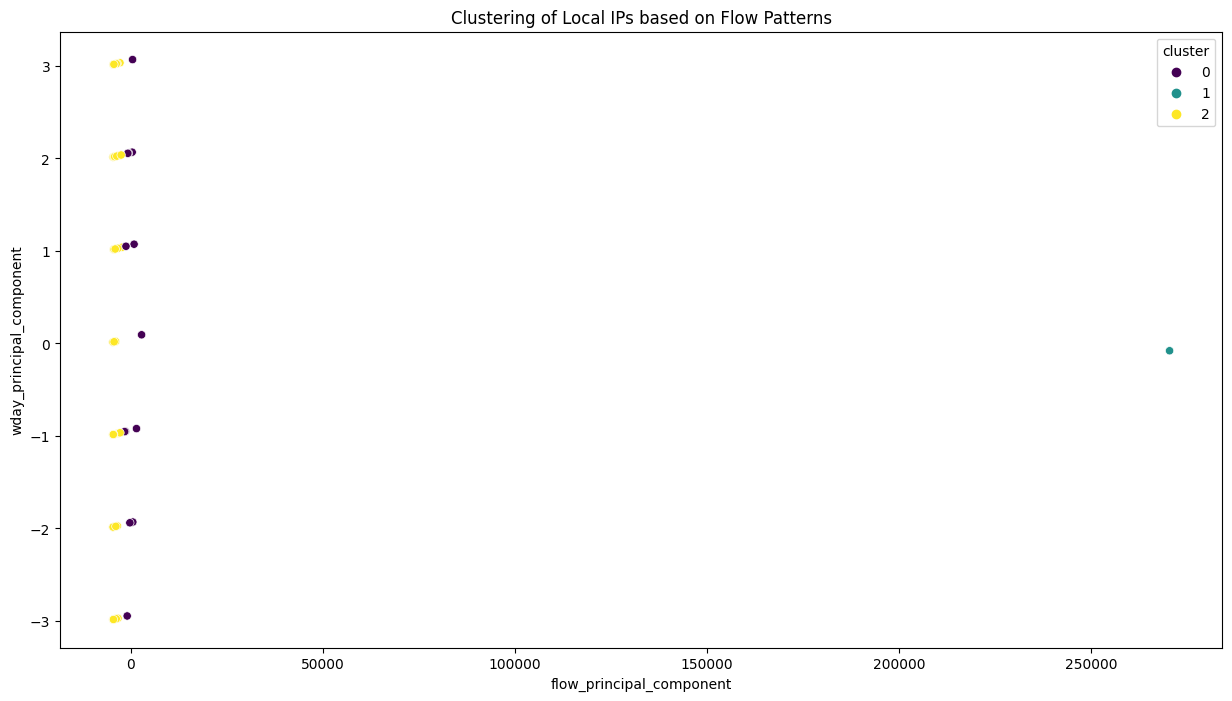

Clustering for Local IP 5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


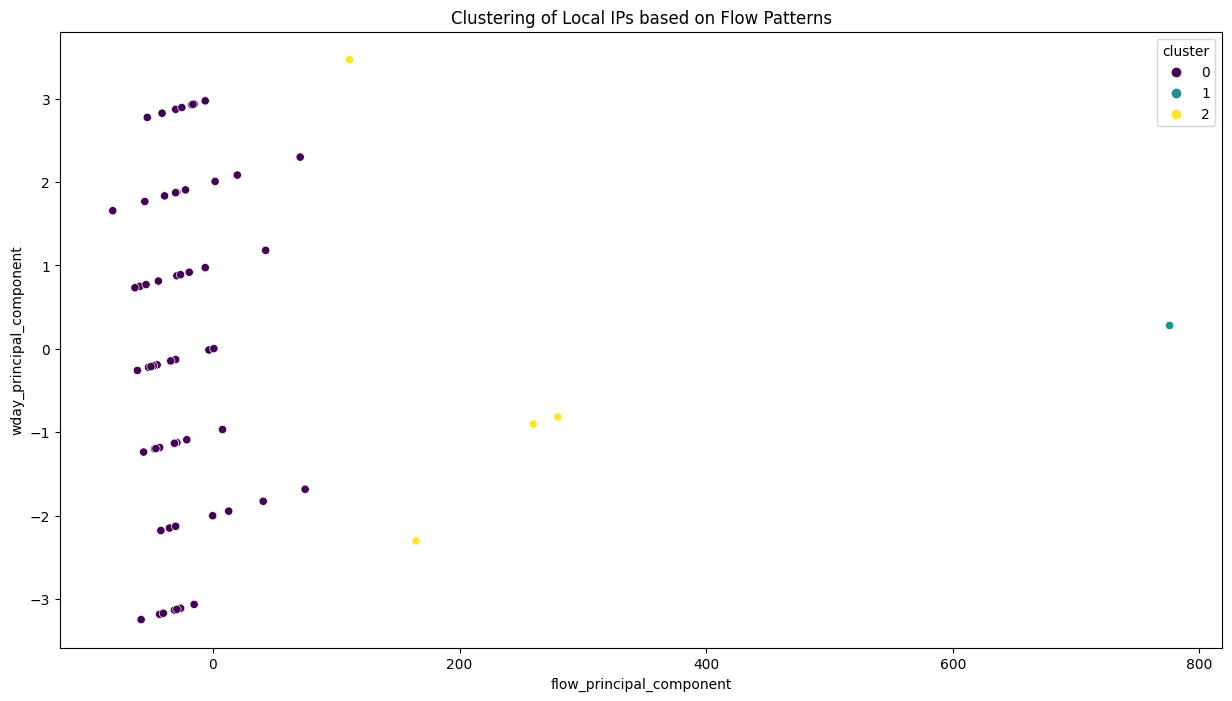

Clustering for Local IP 6


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


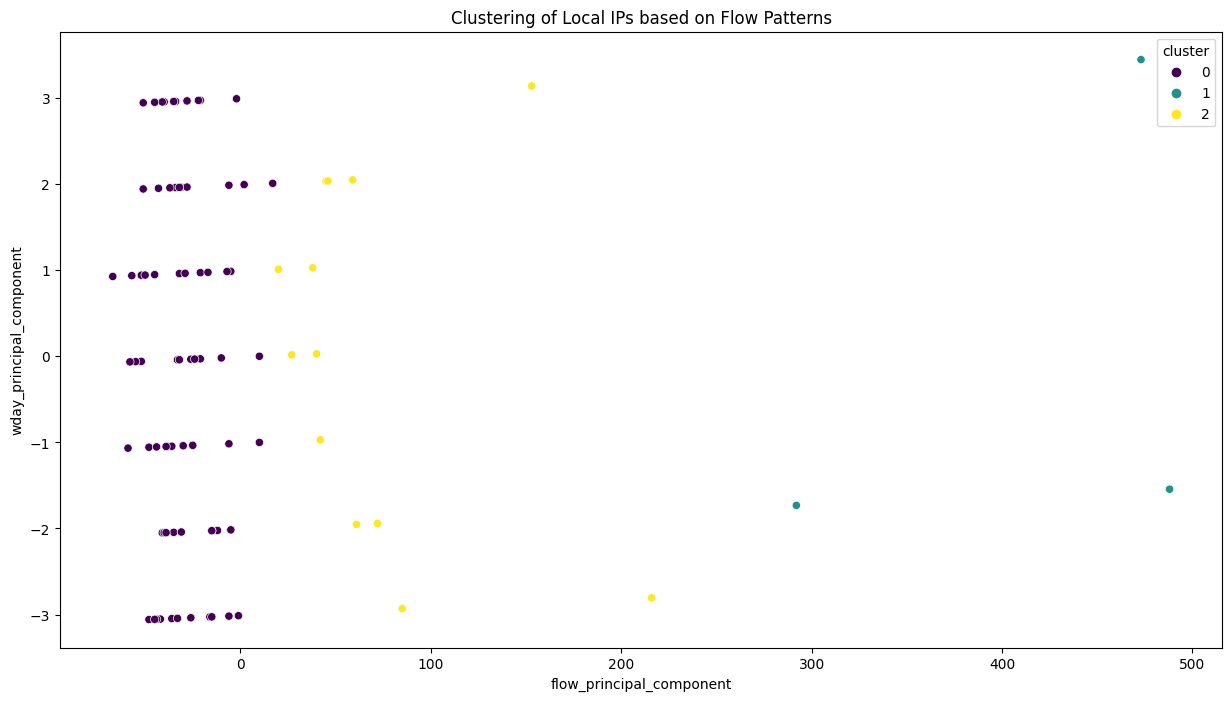

Clustering for Local IP 7


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


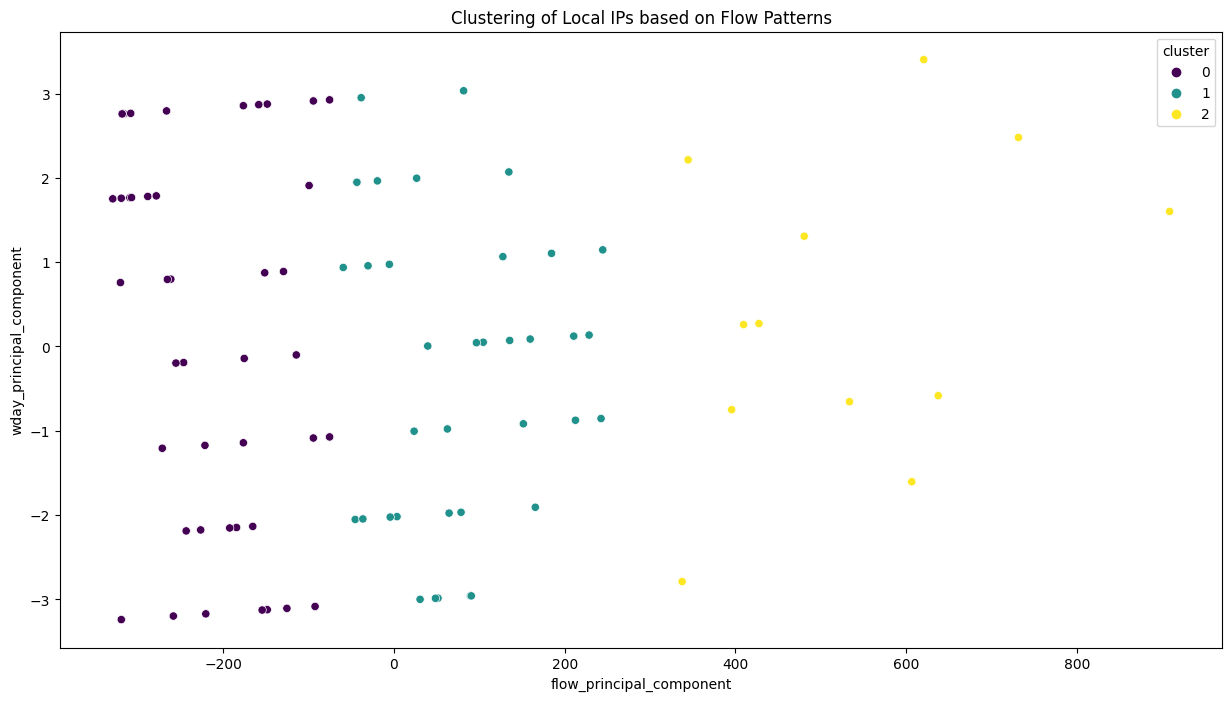

Clustering for Local IP 8


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


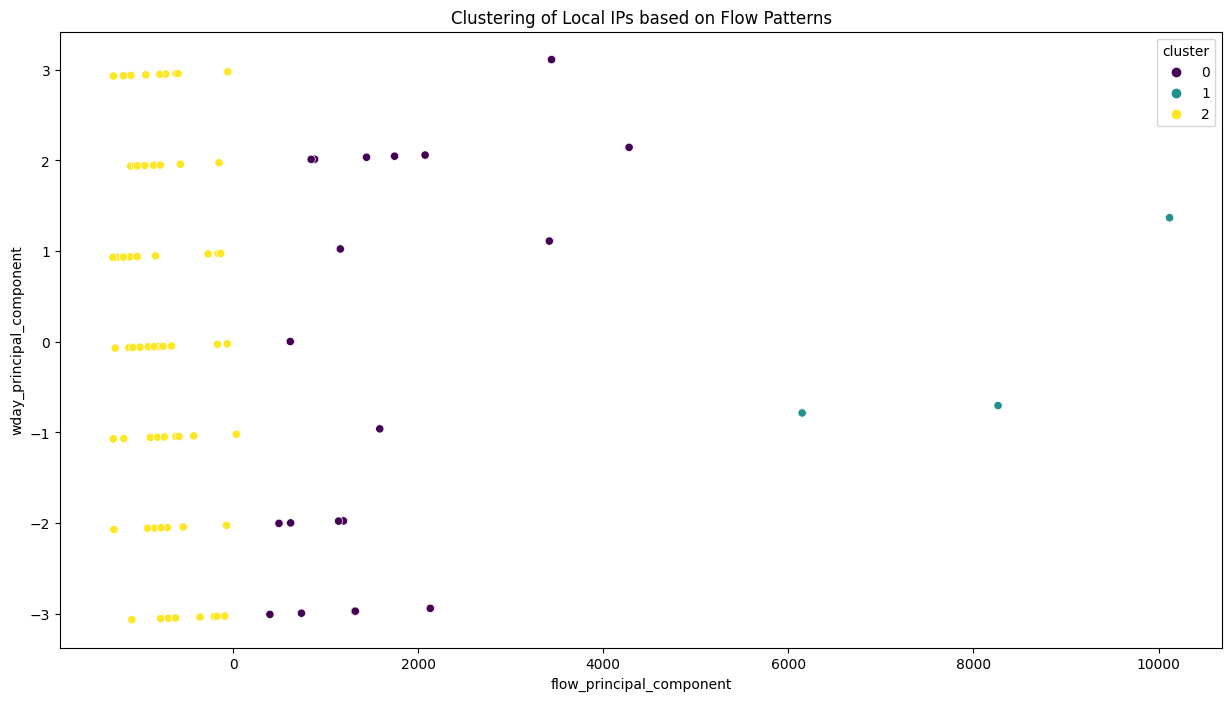

Clustering for Local IP 9


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


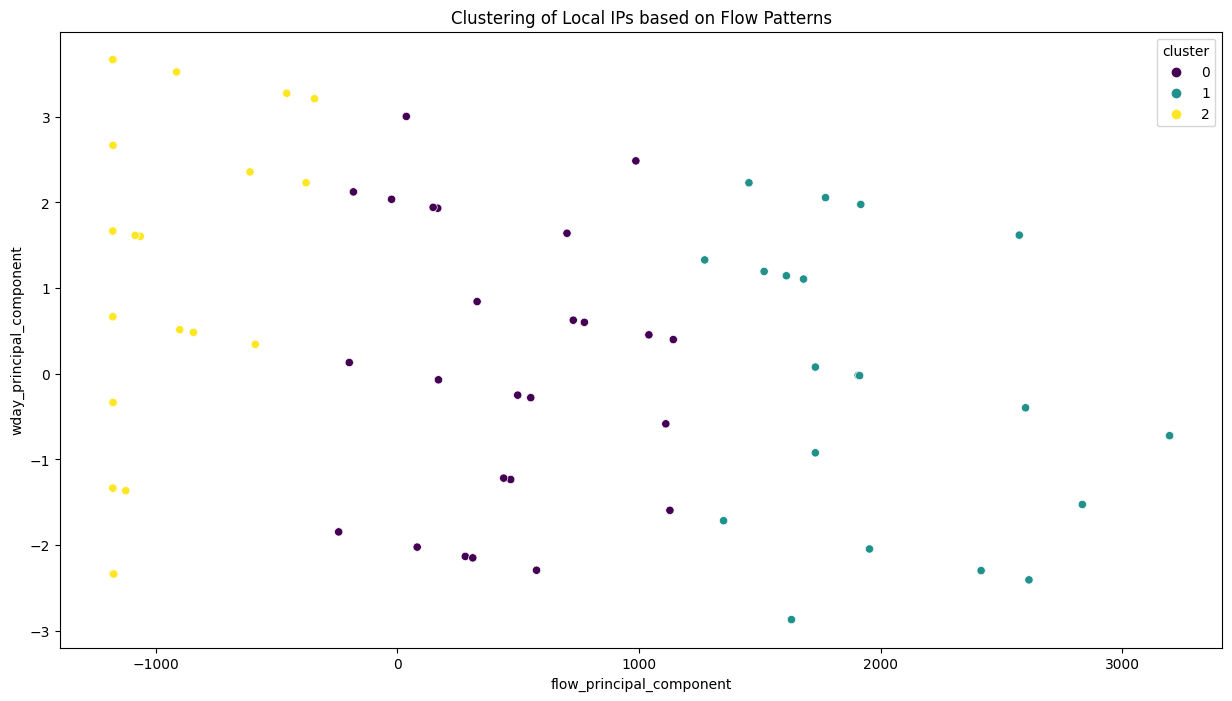

In [ ]:
def perform_clustering(data, feature_column='f', n_clusters=3):
    data[feature_column] = data[feature_column].astype('float32')

    X = data[[feature_column, 'wday']].values

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data['cluster'] = kmeans.fit_predict(X)

    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(X)
    data['flow_principal_component'] = reduced_data[:, 0]
    data['wday_principal_component'] = reduced_data[:, 1]

    plt.figure(figsize=(15, 8))
    sns.scatterplot(x='flow_principal_component', y='wday_principal_component', hue='cluster', data=data, palette='viridis')
    plt.title("Clustering of Local IPs based on Flow Patterns")
    plt.show()

for i, ip_data in enumerate([ip0, ip1, ip2, ip3, ip4, ip5, ip6, ip7, ip8, ip9]):
    print(f"Clustering for Local IP {i}")
    perform_clustering(ip_data[['f', 'wday']].copy(), n_clusters=3)
